# ESTIMATION OF OBESITY LEVELS BASED ON EATING HABITS AND PHYSICAL CONDITION

**GROUP 02 _ DATA103 S11**

Members:

* CHEN, Ysabelle Chloe T.
* DE SILVA, Wayne Flossien T.
* DEMAFELIX, Christienne Angelo D.

## INTRODUCTION

The study highlights obesity as a critical health issue affecting over 800 million people globally in 2022, with 27 million Filipinos impacted due to a variety of factors beyond just overeating, such as food and activity disparities and environmental, genetic, and emotional influences. By 2023, obesity is expected to afflict over 9 million Filipino adolescents, exacerbating the risk of severe health conditions. 

This project explores the impact of eating habits and physical conditions on obesity by employing machine learning models like K-Nearest Neighbors, SVM, and Logistic Regression. The specific objectives include using one-hot encoding for categorical data, comparing modeling methods, and establishing a correlation between BMI and obesity influencers to identify key intervention targets.

### IMPORTING LIBRARIES

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew, kurtosis

%matplotlib inline

### THE DATASET

The dataset was sourced from a data article entitled “Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico” published in 2019 by authors Fabio Mendoza Palechor and Alexis de la Hoz Manotas. In the article, the authors indicated that the dataset is intended to be used in building intelligent computational models and recommender systems that can aid in estimating the obesity level of an individual and in monitoring obesity levels.

In [170]:
df_obesity = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
df_obesity.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

The data was collected through an online survey on a website. The respondents were anonymous users from Mexico, Peru, and Colombia, aged between 14 and 61 years. The questions in the survey were related to the user's eating habits and physical conditions, as well as other variables such as height, weight, age, and gender. A total of 2111 records are in the dataset, with 16 features and 1 additional class label listed below:

In [171]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## EXPLORATORY DATA ANALYSIS (EDA)

In [172]:
# HANDLE MISSING VALUES (IF THERE ARE ANY)

total_nulls = df_obesity.isna().sum()
total_nulls

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [173]:
# HANDLE IMBALANCED DATASET

class_distribution = df_obesity['NObeyesdad'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable
print(class_distribution)

Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: NObeyesdad, dtype: float64


### ANALYZING NUMERICAL FEATURES

In [174]:
# LIST OF COLUMNS WITH NUMERICAL DATA

float64_columns = df_obesity.select_dtypes(include=['float64']).columns
float64_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [175]:
# DESCRIPTIVE STATISTICS

df_obesity.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

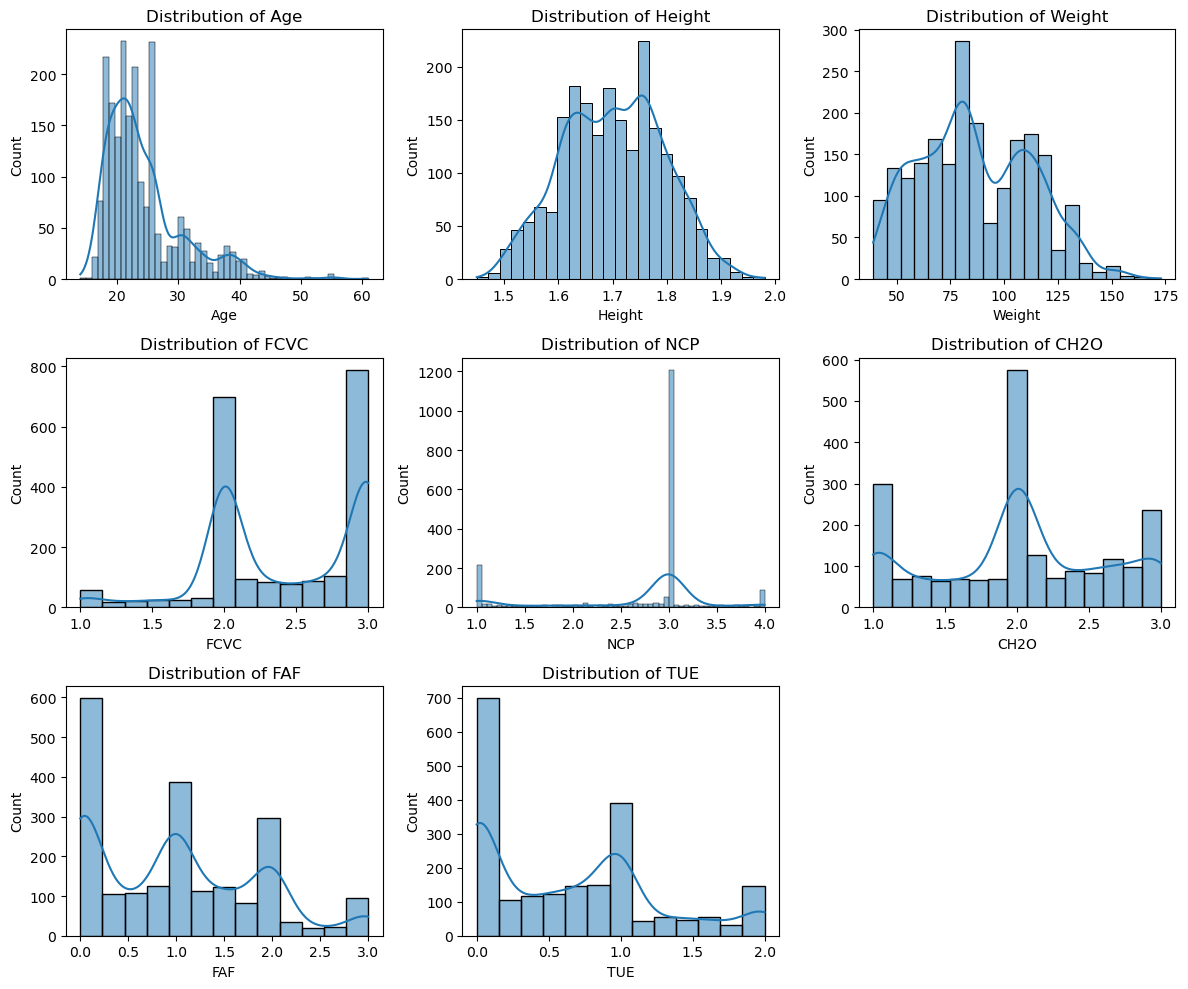

Age: Skewness = 1.53, Kurtosis = 2.82
Height: Skewness = -0.01, Kurtosis = -0.56
Weight: Skewness = 0.26, Kurtosis = -0.70
FCVC: Skewness = -0.43, Kurtosis = -0.64
NCP: Skewness = -1.11, Kurtosis = 0.38
CH2O: Skewness = -0.10, Kurtosis = -0.88
FAF: Skewness = 0.50, Kurtosis = -0.62
TUE: Skewness = 0.62, Kurtosis = -0.55


In [176]:
# PLOT HISTOGRAMS FOR NUMERICAL COLUMNS

plt.figure(figsize=(12, 10))
for i, col in enumerate(float64_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_obesity[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# CALCULATION OF SKEWNESS AND KURTOSIS

for col in float64_columns:
    print(f'{col}: Skewness = {skew(df_obesity[col]):.2f}, Kurtosis = {kurtosis(df_obesity[col]):.2f}')

#### INSIGHTS

|Feature | Skewness  | Kurtosis | Interpretation |
|--------|-----------|----------|------------------|
|Age	 |1.53	     |2.82	    |Positively skewed, leptokurtic (heavy tails) |
|Height	 |-0.01      |	-0.56   |	Approximately symmetric, platykurtic (light tails) |
|Weight  |	0.26	 |-0.70	    |Slightly positively skewed, platykurtic (light tails) |
|FCVC	 |-0.43	     |-0.64	    |Negatively skewed, platykurtic (light tails) |
|NCP	 |-1.11	     |0.38	    |Negatively skewed, mesokurtic (normal-like) |
|CH2O	 |-0.10      |	-0.88	|Approximately symmetric, platykurtic (light tails) |
|FAF	 |0.50	     |-0.62	    |Positively skewed, platykurtic (light tails) |
|TUE	 |0.62	     |-0.55	    |Positively skewed, platykurtic (light tails) |

- **Age:** The distribution of age might be skewed towards older individuals with some extreme values (outliers).
- **Height:** Height is relatively normally distributed with fewer outliers than expected.
- **Weight:** Weight has a slight positive skew, meaning there might be a few individuals with significantly higher weights.
- **FCVC, NCP, CH2O, FAF, TUE:** These variables show a tendency towards platykurtic distributions, suggesting fewer extreme values than expected in a normal distribution.

In [177]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [178]:
# Apply log transformation to positively skewed features
for feature in float64_columns:
    if df_obesity[feature].min() > 0:
        df_obesity[feature] = np.log1p(df_obesity[feature])
    else:
        # Apply Yeo-Johnson transformation to handle zero or negative values
        pt = PowerTransformer(method='yeo-johnson')
        df_obesity[feature] = pt.fit_transform(df_obesity[[feature]])

In [179]:
scaler = StandardScaler()
df_obesity[float64_columns] = scaler.fit_transform(df_obesity[float64_columns])

In [180]:
print(df_obesity[float64_columns].skew())
print(df_obesity[float64_columns].kurtosis())

Age       0.888617
Height   -0.087120
Weight   -0.287641
FCVC     -0.818050
NCP      -1.435761
CH2O     -0.448222
FAF      -0.021036
TUE       0.043706
dtype: float64
Age       0.454576
Height   -0.561748
Weight   -0.746210
FCVC      0.534313
NCP       0.779453
CH2O     -0.756161
FAF      -1.201672
TUE      -1.339300
dtype: float64


In [181]:
df_obesity.describe()

Age        Height        Weight          FCVC           NCP  \
count  2.111000e+03  2.111000e+03  2.111000e+03  2.111000e+03  2.111000e+03   
mean  -7.539629e-16 -2.356134e-15  3.769815e-16 -3.231270e-16  5.015200e-16   
std    1.000237e+00  1.000237e+00  1.000237e+00  1.000237e+00  1.000237e+00   
min   -2.208328e+00 -2.810824e+00 -2.361211e+00 -3.147676e+00 -2.309972e+00   
25%   -7.223153e-01 -7.604027e-01 -7.334278e-01 -7.074655e-01  8.267055e-02   
50%   -1.583031e-01  4.652706e-03  1.654528e-02  2.008618e-02  4.359433e-01   
75%    4.071737e-01  7.235307e-01  8.347104e-01  1.023891e+00  4.359433e-01   
max    4.106236e+00  2.853048e+00  2.350399e+00  1.023891e+00  1.319931e+00   

               CH2O           FAF           TUE  
count  2.111000e+03  2.111000e+03  2.111000e+03  
mean   4.644950e-16  1.346362e-17  3.029315e-17  
std    1.000237e+00  1.000237e+00  1.000237e+00  
min   -1.806307e+00 -1.362546e+00 -1.244658e+00  
25%   -6.062205e-01 -1.110953e+00 -1.244658e+00  
50%    9.071723e-02  1.757917e-01  1.763955e-01  
75%    7.816504e-01  8.524139e-01  7.281009e-01  
max    1.436677e+00  1.846167e+00  1.720332e+00

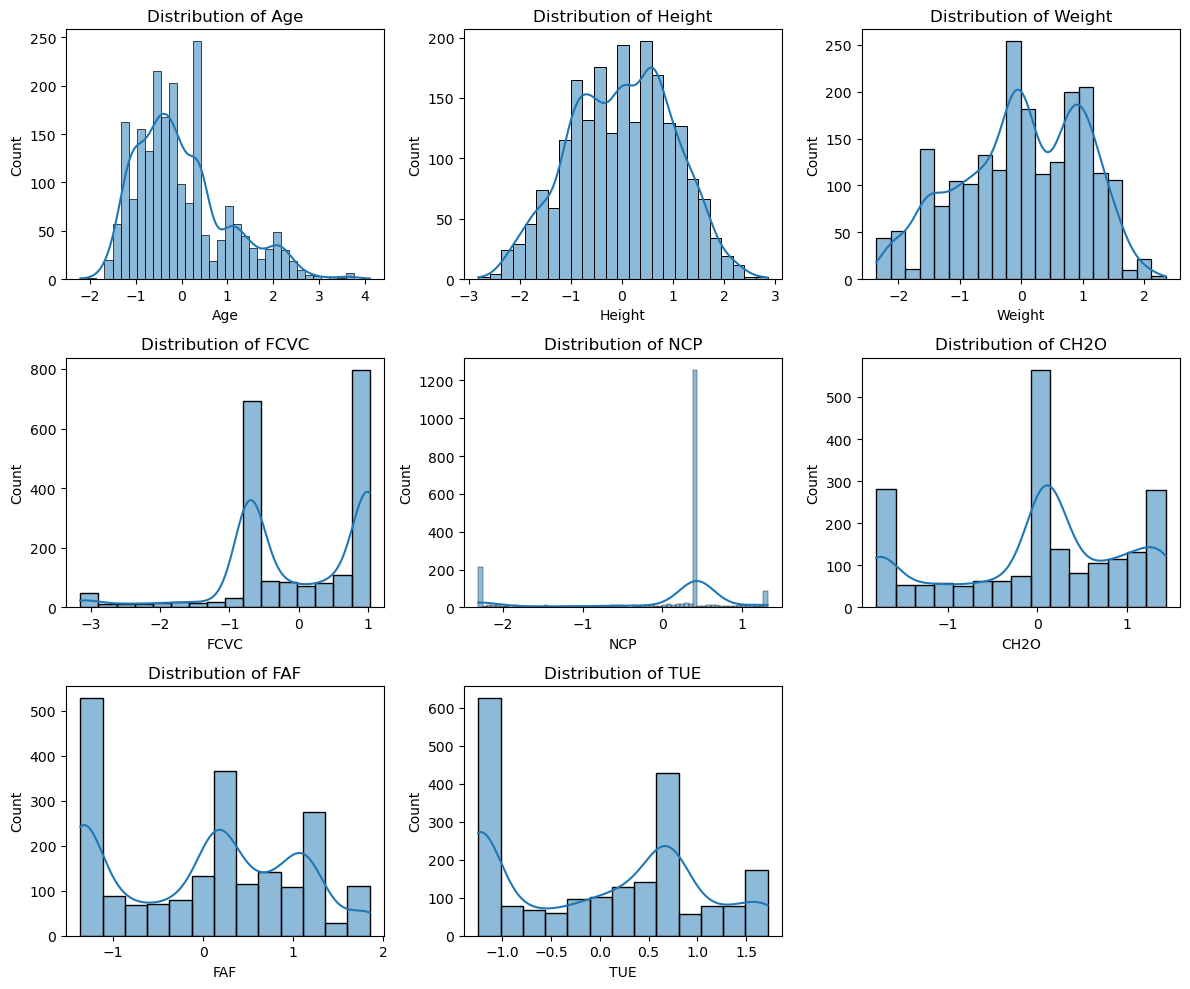

Age: Skewness = 0.89, Kurtosis = 0.45
Height: Skewness = -0.09, Kurtosis = -0.56
Weight: Skewness = -0.29, Kurtosis = -0.75
FCVC: Skewness = -0.82, Kurtosis = 0.53
NCP: Skewness = -1.43, Kurtosis = 0.77
CH2O: Skewness = -0.45, Kurtosis = -0.76
FAF: Skewness = -0.02, Kurtosis = -1.20
TUE: Skewness = 0.04, Kurtosis = -1.34


In [182]:
# PLOT HISTOGRAMS FOR NUMERICAL COLUMNS

plt.figure(figsize=(12, 10))
for i, col in enumerate(float64_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_obesity[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# CALCULATION OF SKEWNESS AND KURTOSIS

for col in float64_columns:
    print(f'{col}: Skewness = {skew(df_obesity[col]):.2f}, Kurtosis = {kurtosis(df_obesity[col]):.2f}')

#### INSIGHTS

|Feature | Skewness  | Kurtosis | Interpretation |
|--------|-----------|----------|------------------|
|Age	|0.89	|0.45	|Positively skewed, slightly leptokurtic (slightly heavy tails)|
|Height	|-0.09	|-0.56	|Slightly negatively skewed, platykurtic (light tails)|
|Weight	|-0.29	|-0.75	|Negatively skewed, platykurtic (light tails)|
|FCVC	|-0.82	|0.53	|Strongly negatively skewed, slightly leptokurtic (slightly heavy tails)|
|NCP	|-1.43	|0.77	|Strongly negatively skewed, leptokurtic (heavy tails)|
|CH2O	|-0.45	|-0.76	|Negatively skewed, platykurtic (light tails)|
|FAF	|-0.02	|-1.20	|Approximately symmetric, strongly platykurtic (very light tails)|
|TUE	|0.04	|-1.34	|Approximately symmetric, strongly platykurtic (very light tails)|

- **Age:** The distribution of age is skewed to the right, indicating a higher proportion of younger individuals.
- **Height:** Height is relatively symmetrical, but slightly skewed towards shorter individuals.
- **Weight:** The distribution of weight is skewed to the left, suggesting a higher proportion of people with lower weights.
- **FCVC, NCP, CH2O:** These features are negatively skewed, meaning there's a longer tail towards lower values.
- **FAF and TUE:** Both are approximately symmetric with extremely light tails, indicating a very concentrated distribution around the mean.

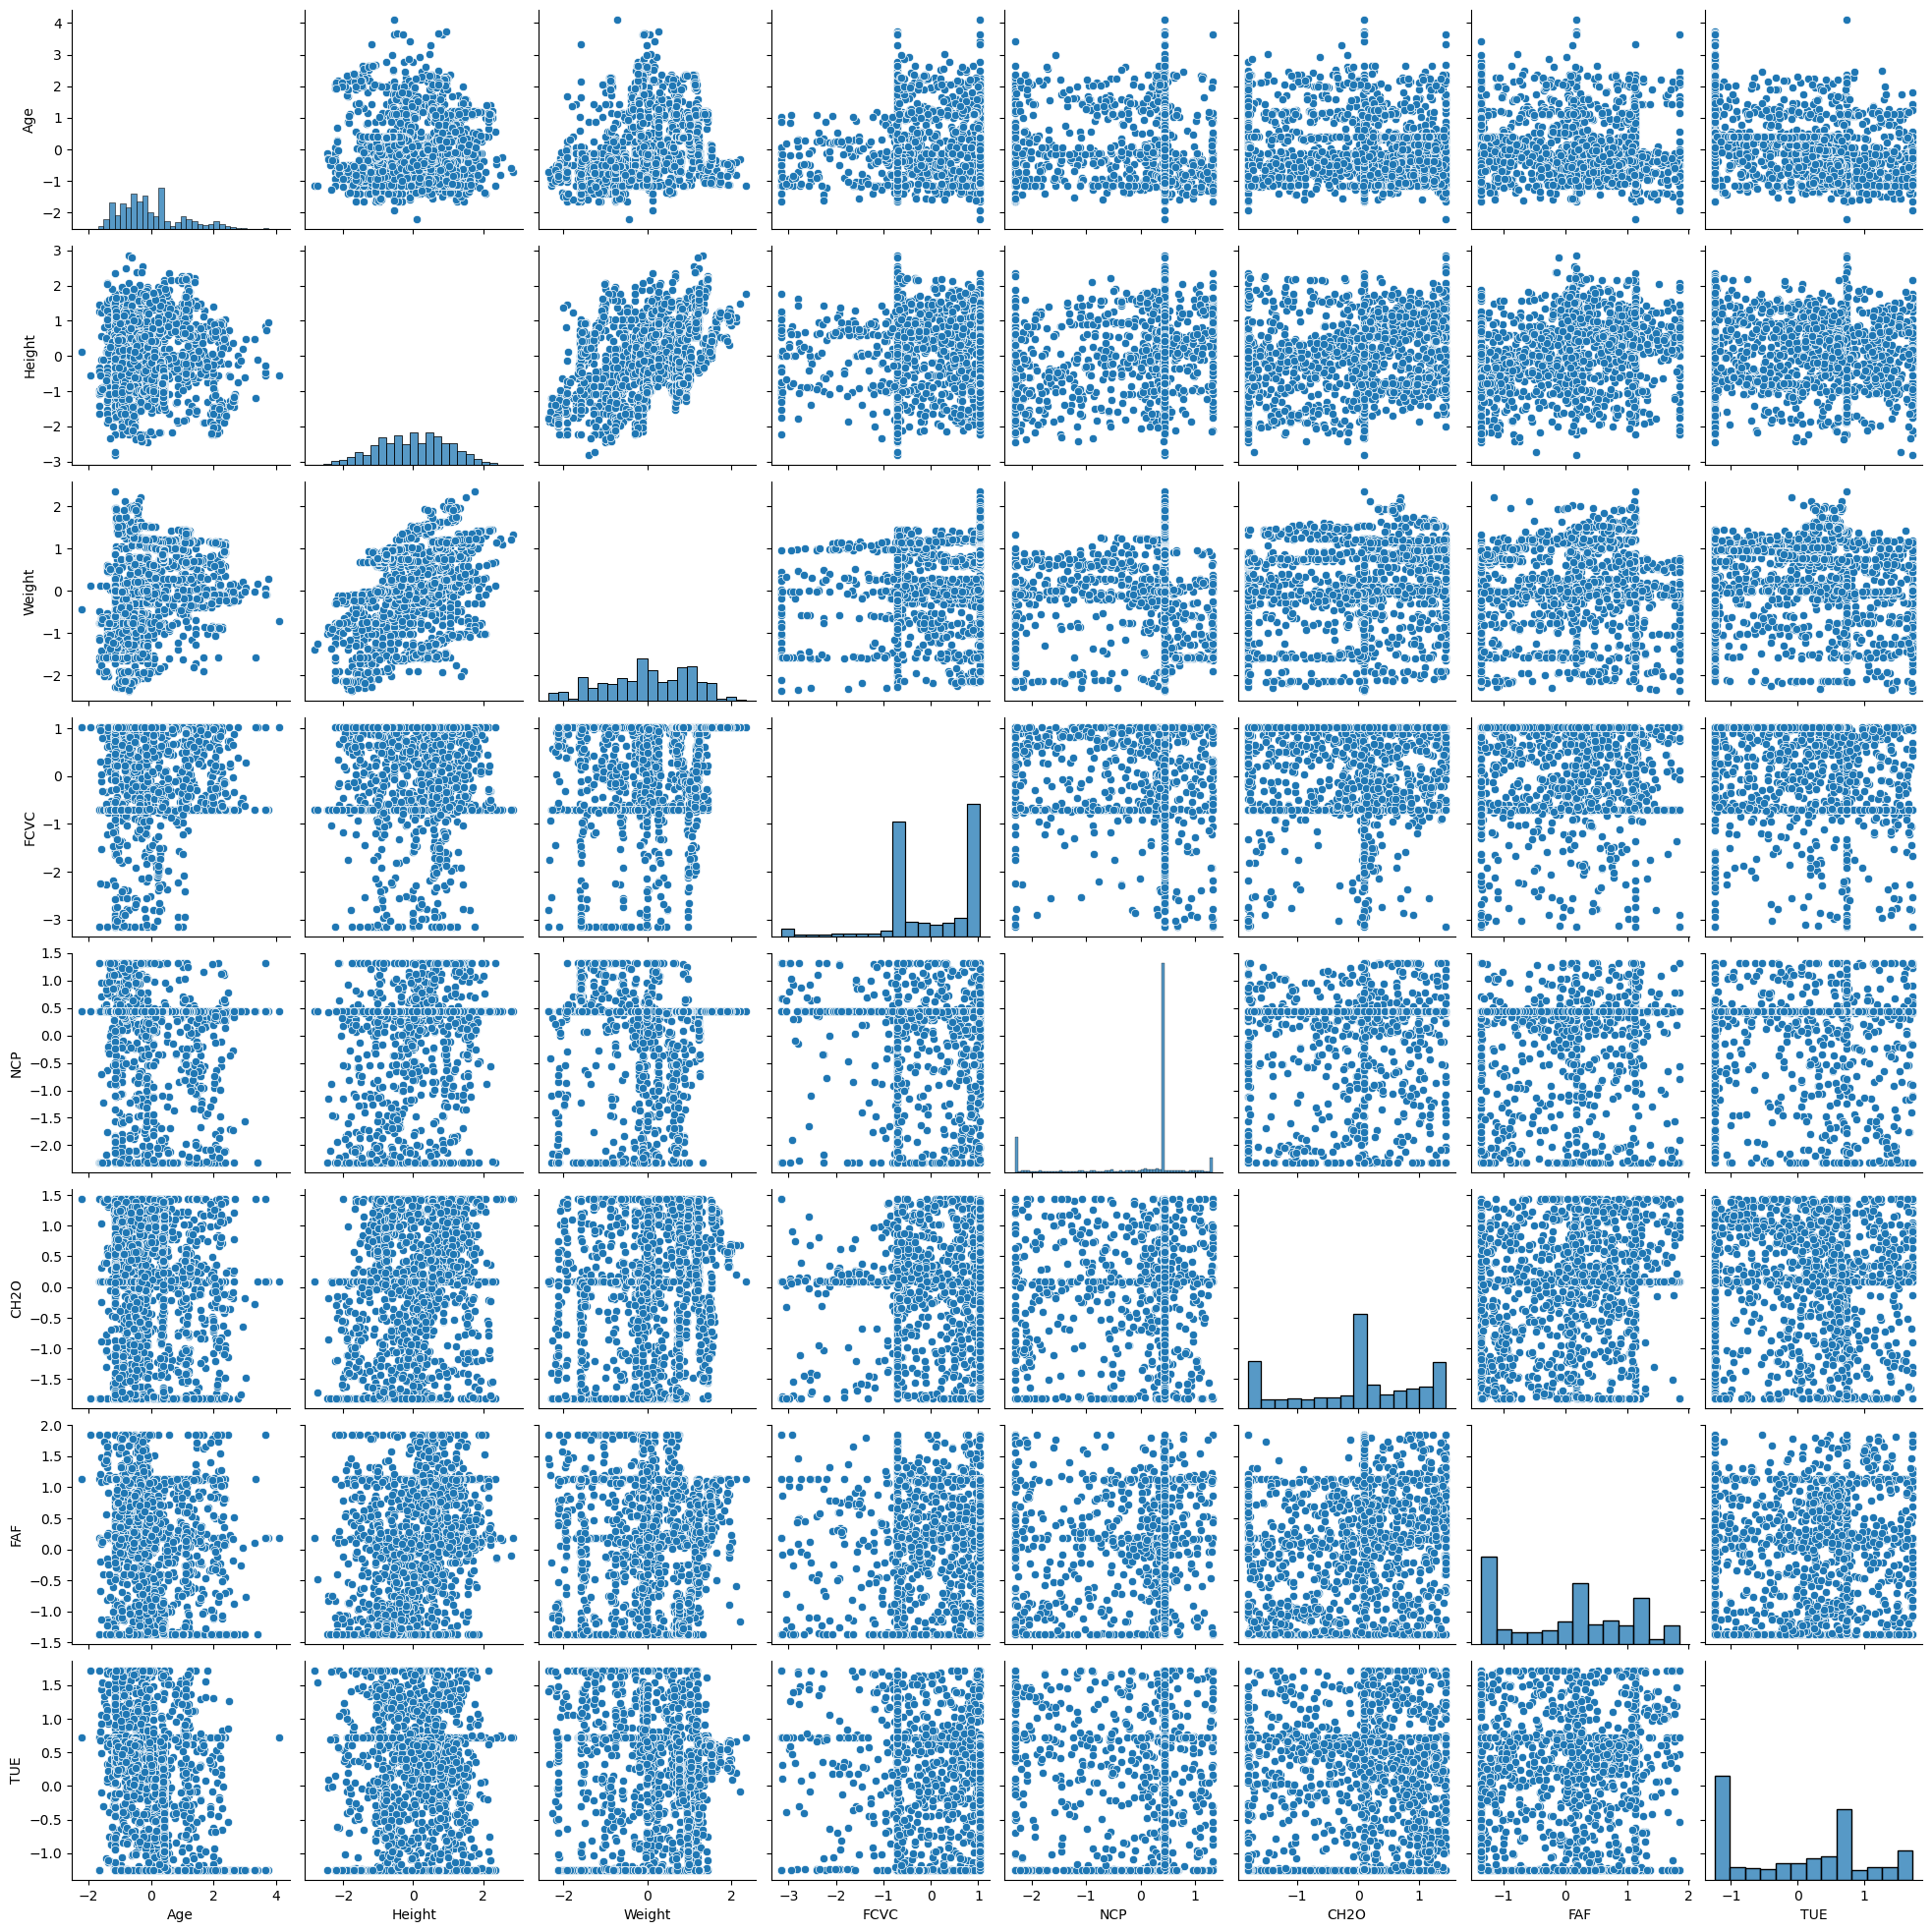

In [183]:
# CONSTRUCT PAIRPLOTS TO VISUALIZE RELATIONSHIPS BETWEEN NUMERICAL FEATURES

sns.pairplot(df_obesity)
plt.show()

#### INSIGHTS

- **Age:** The concentration of data points on the left side indicates that a significant portion of the dataset is composed of younger individuals.
- **Height and Weight:** While the distribution for height seems to be more centered, weight is skewed towards lower values. This might suggest a correlation between age, height, and weight, but further analysis is necessary.
- **FCVC:** A concentration of data points in the upper right corner might indicate a relationship between FCVC and other variables, perhaps with higher values of both variables being more common.
- **NCP and CH2O:** Both seem to have a relatively wide distribution, suggesting variability in these measurements. The fact that NCP's data is more tightly clustered might indicate a different pattern compared to CH2O.
- **FAF and TUE:** The data points being concentrated between -1 and 1 could suggest a standardized or normalized scale for these variables. It might also indicate a limited range of values for these features in the dataset.

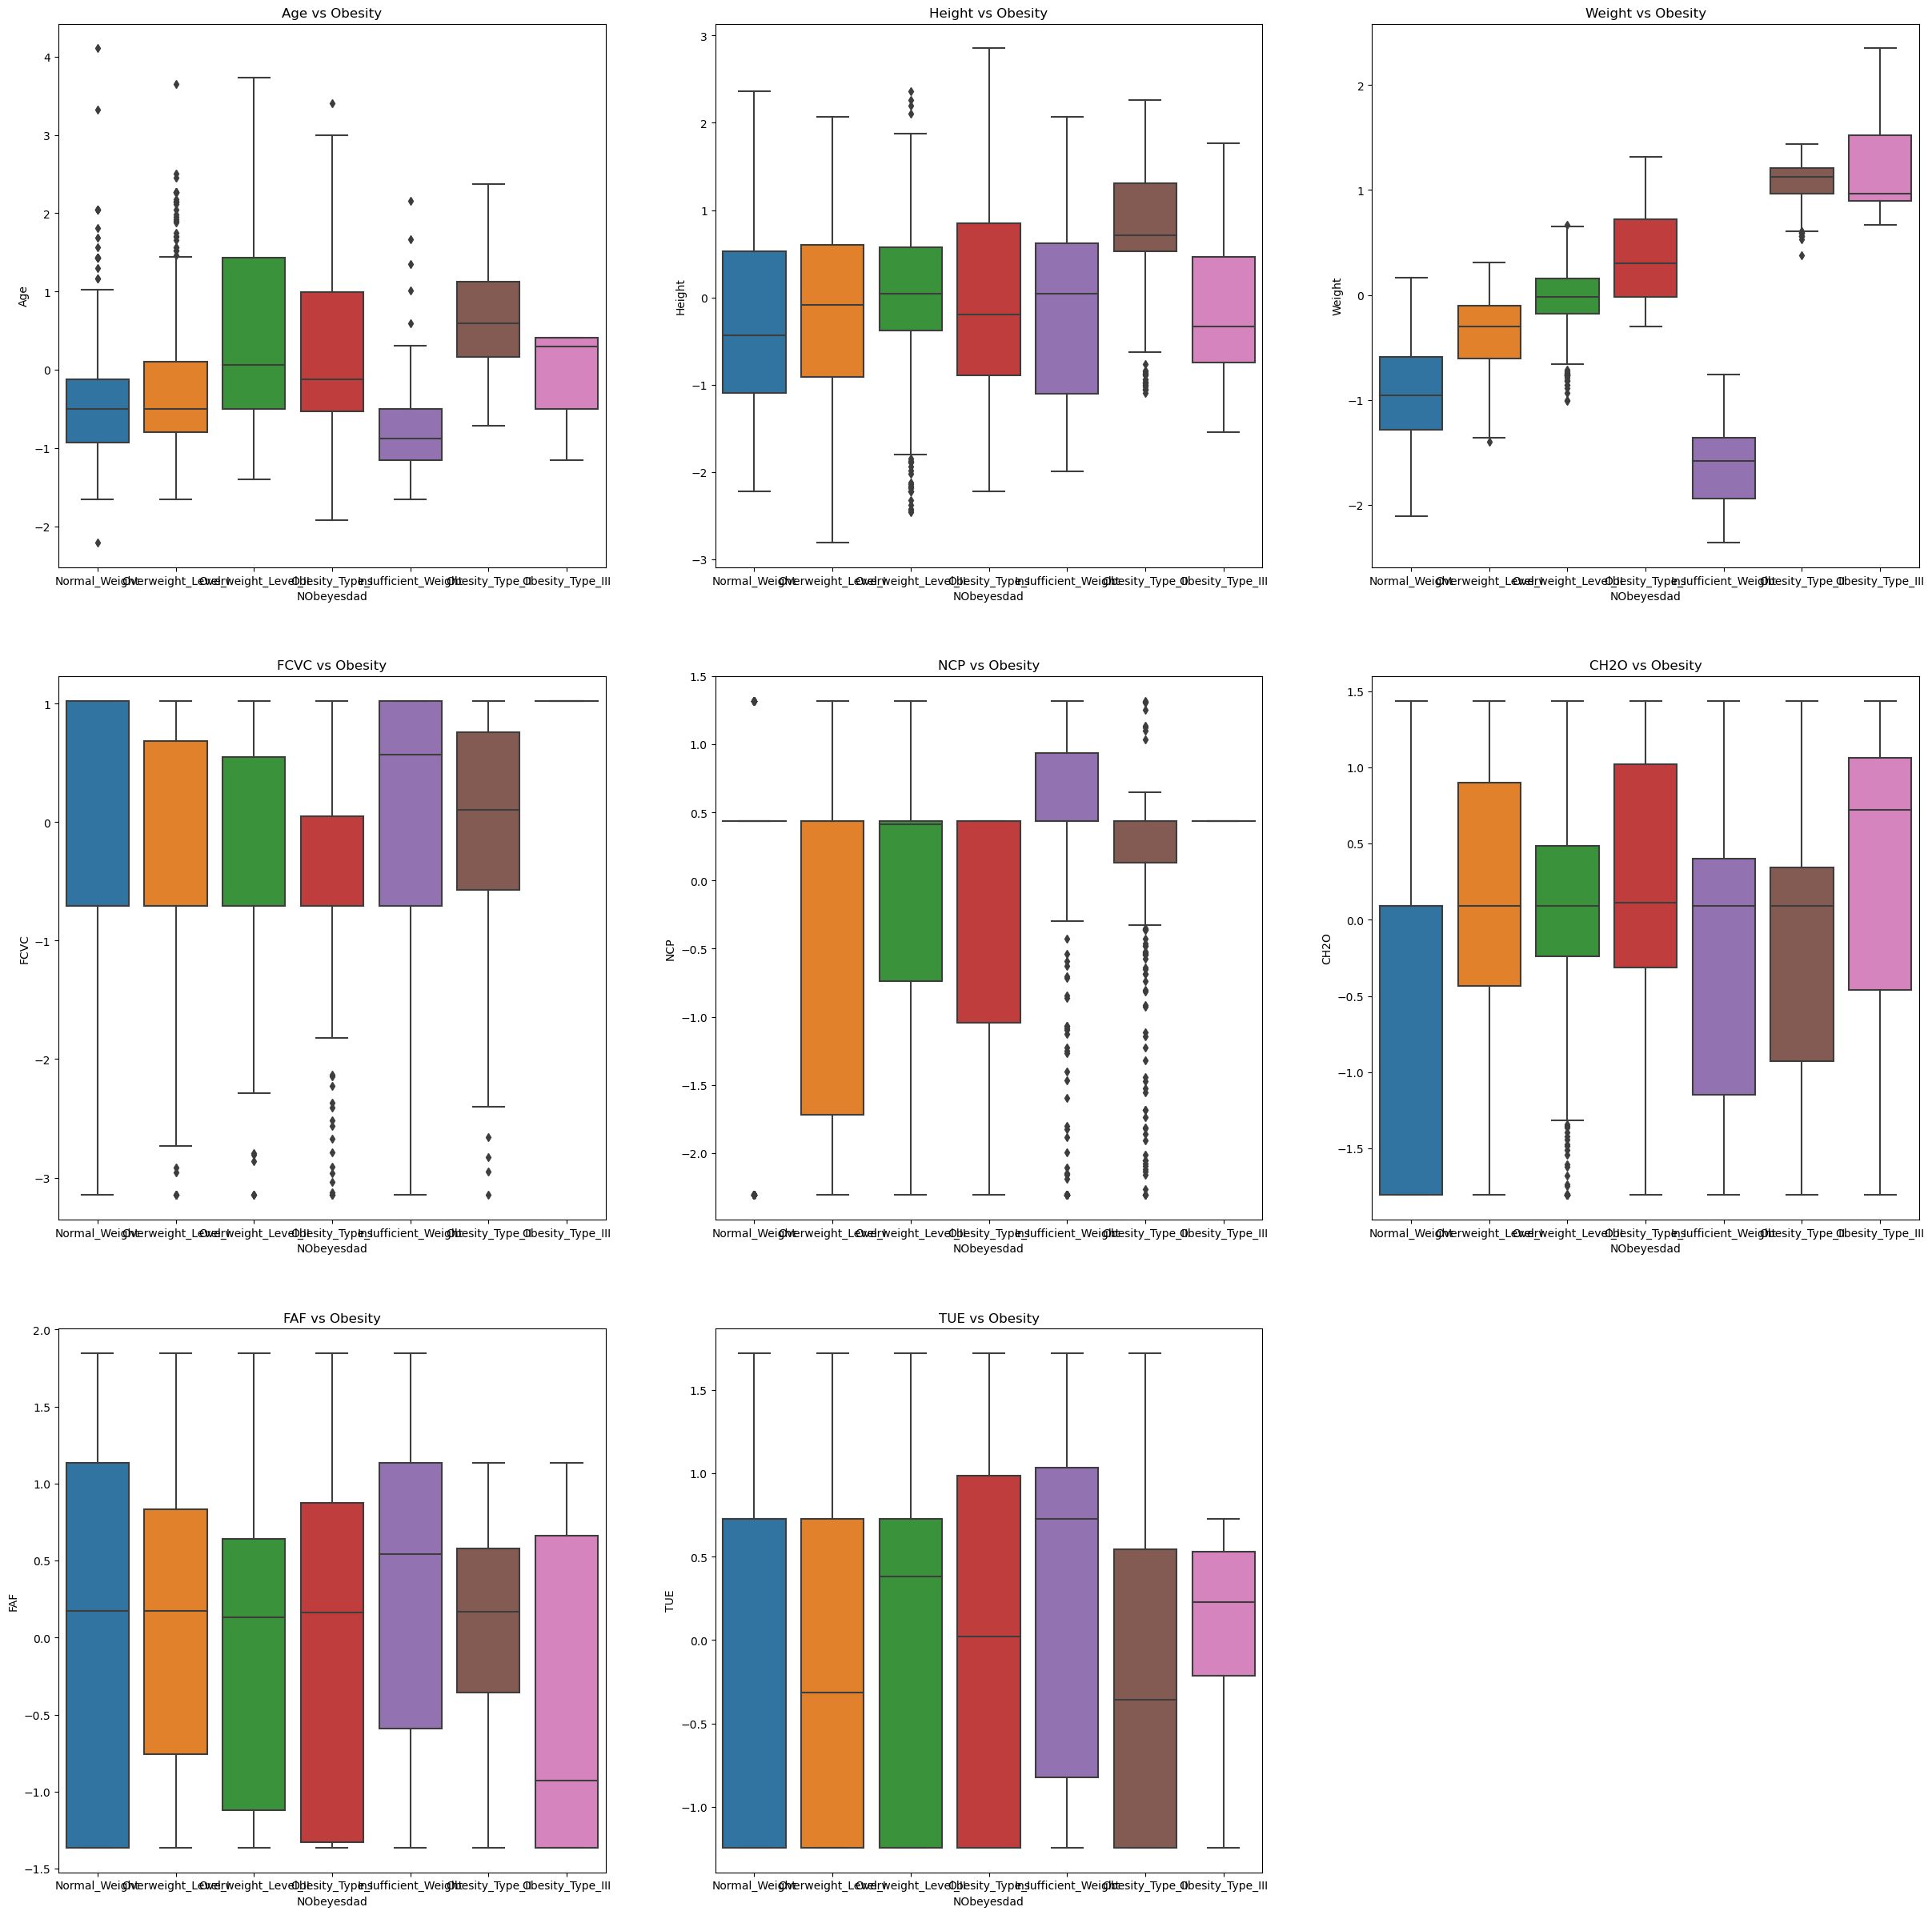

In [184]:
# CONSTRUCT BOXPLOTS TO VISUALIZE NUMERICAL FEATURES VS. TARGET FEATURE

plt.figure(figsize=(30, 30))
for i, col in enumerate(float64_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_obesity, x='NObeyesdad', y=col)
    plt.title(f'{col} vs Obesity')
#plt.tight_layout()
plt.show()

#### INSIGHTS

**Variables and Their Relationships to Obesity**

1. **Age**
- Observation: Most age values fall below 1 for all obesity categories except Obesity_Type_III and Overweight_Level_II.
- Interpretation: This suggests that younger individuals are more likely to be in lower obesity categories, while older individuals tend to be in higher categories. However, there might be exceptions or overlaps.

2. **Height**
- Observation: Height values range from -1 to 0.5 for most obesity categories, with Overweight_Level_II exceeding 1.
- Interpretation: There seems to be a slight positive correlation between height and obesity, especially for Overweight_Level_II. However, the overall range of values is relatively small, indicating that height might not be a strong predictor of obesity.

3. **Weight**
- Observation: Weight values show an upward trend across obesity categories, with Insufficient Weight being an outlier at -2.
- Interpretation: This is expected, as weight is directly related to obesity. The outlier for Insufficient Weight might indicate a specific subgroup or data error.

4. **FCVC**
- Observation: All FCVC values are greater than 1 across obesity categories.
- Interpretation: This could mean that FCVC is a relatively high value for all individuals in the dataset, or there might be an issue with the data scaling or units.

5. **NCP**
- Observation: The threshold level for NCP is just below 0.5.
- Interpretation: This suggests that NCP values are generally low for all obesity categories, with a potential cutoff point around 0.5.

6. **CH2O, FAF, and TUE**
- Observation: These variables show a wider range and more variation across obesity categories.
- Interpretation: These variables might have less direct relationships with obesity or their effects might be more complex.

### ANALYZING CATEGORICAL FEATURES

In [216]:
# LIST OF COLUMNS WITH CATEGORICAL DATA

object_columns = df_obesity.select_dtypes(include='object').columns
object_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [186]:
# DESCRIPTIVE STATISTICS

df_obesity.describe(include=object)

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351

In [187]:
# IDENTIFY UNIQUE VALUES FOR EACH OBJECT COLUMN

for col in object_columns:
    unique_values = df_obesity[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Gender':
['Female' 'Male']


Unique values in column 'family_history_with_overweight':
['yes' 'no']


Unique values in column 'FAVC':
['no' 'yes']


Unique values in column 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no']


Unique values in column 'SMOKE':
['no' 'yes']


Unique values in column 'SCC':
['no' 'yes']


Unique values in column 'CALC':
['no' 'Sometimes' 'Frequently' 'Always']


Unique values in column 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


Unique values in column 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




In [188]:
# ONE-HOT ENCODE CATEGORICAL FEATURES

df_encoded = pd.get_dummies(df_obesity, columns=object_columns, drop_first=True)
df_encoded.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.504109 -0.870580 -0.805258 -0.707465  0.435943  0.090717 -1.362546   
1 -0.504109 -1.996077 -1.226163  1.023891  0.435943  1.436677  1.846167   
2 -0.116931  1.051119 -0.220955 -0.707465  0.435943  0.090717  1.136165   
3  0.569001  1.051119  0.165632  1.023891  0.435943  0.090717  1.136165   
4 -0.306310  0.843795  0.266014 -0.707465 -2.309972  0.090717 -1.362546   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  \
0  0.728101            0                                   1  ...   
1 -1.244658            0                                   1  ...   
2  0.728101            1                                   1  ...   
3 -1.244658            1                                   0  ...   
4 -1.244658            1                                   0  ...   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0            0                 0                             1   
1            0                 0                             1   
2            0                 0                             1   
3            0                 0                             0   
4            0                 0                             1   

   MTRANS_Walking  NObeyesdad_Normal_Weight  NObeyesdad_Obesity_Type_I  \
0               0                         1                          0   
1               0                         1                          0   
2               0                         1                          0   
3               1                         0                          0   
4               0                         0                          0   

   NObeyesdad_Obesity_Type_II  NObeyesdad_Obesity_Type_III  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   NObeyesdad_Overweight_Level_I  NObeyesdad_Overweight_Level_II  
0                              0                               0  
1                              0                               0  
2                              0                               0  
3                              1                               0  
4                              0                               1  

[5 rows x 29 columns]

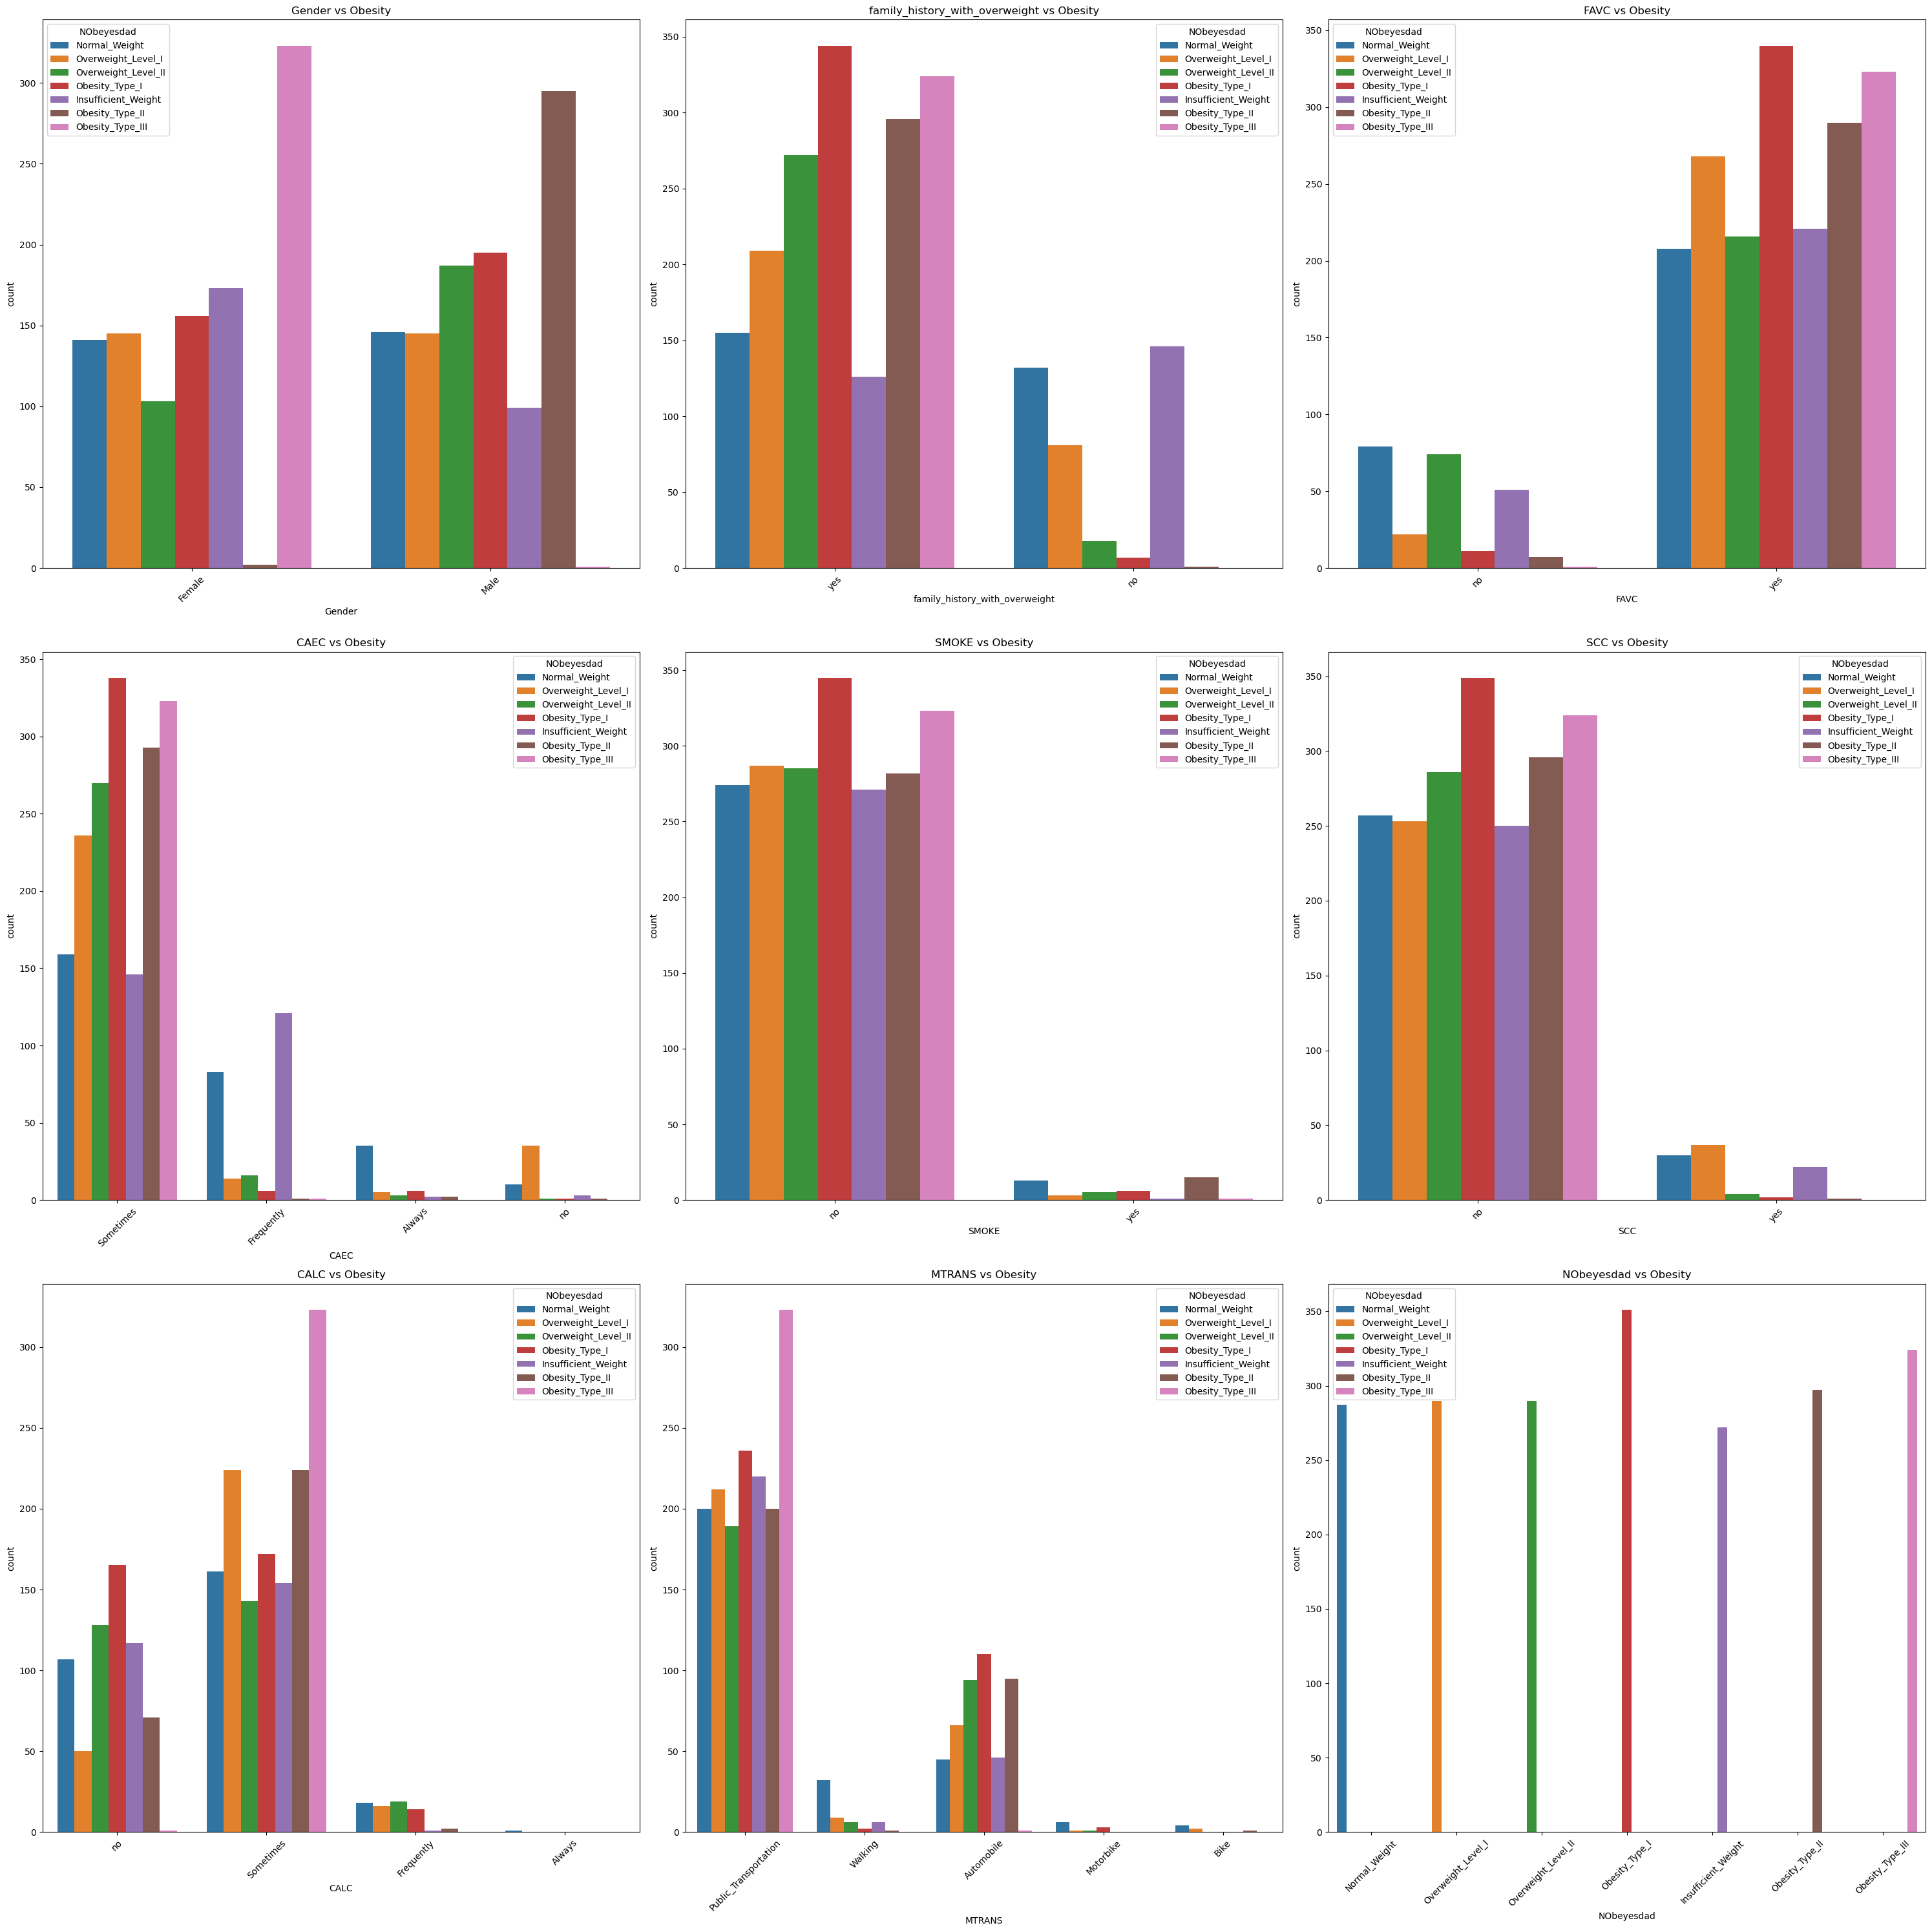

In [189]:
# CONSTRUCT BOXPLOTS TO VISUALIZE CATEGORICAL FEATURES VS. TARGET FEATURE

plt.figure(figsize=(30, 30))
for i, col in enumerate(object_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_obesity, x=col, hue='NObeyesdad')
    plt.title(f'{col} vs Obesity')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

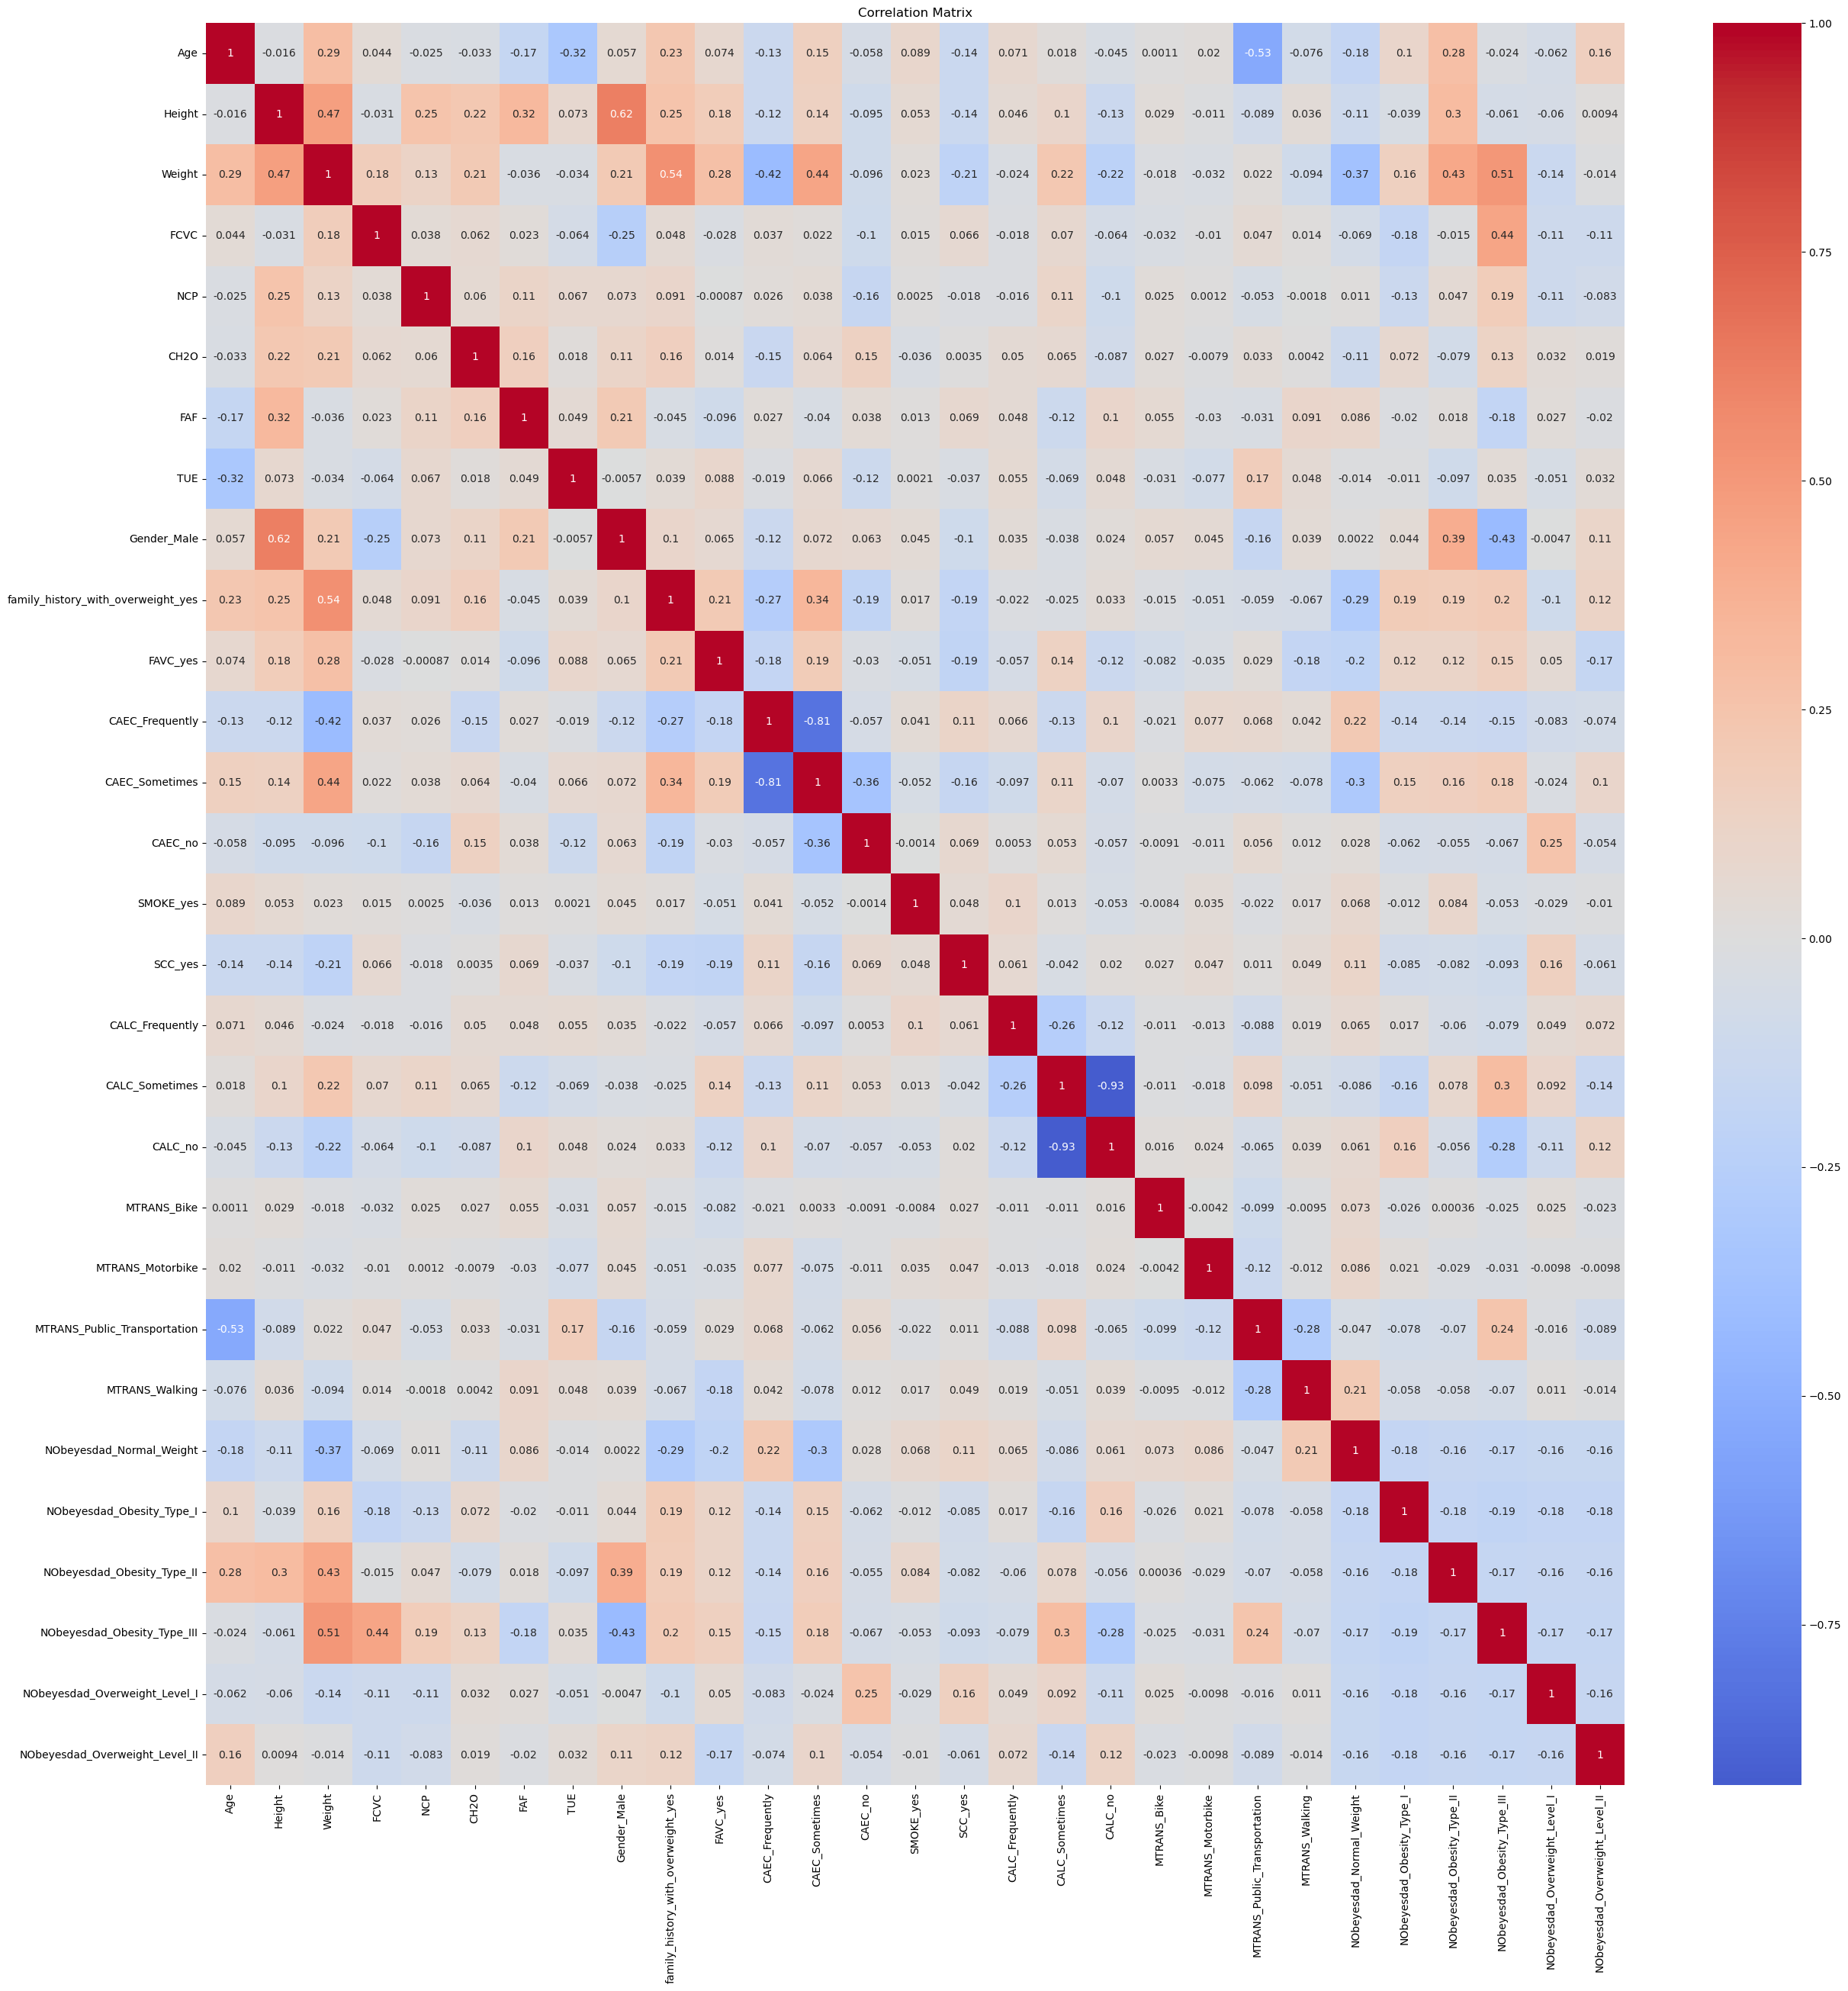

In [190]:
# CALCULATE AND VISUALIZE CORRELATION MATRIX OF NUMERICAL VARIABLES AND ONE-HOT ENCODED CATEGORICAL FEATURES

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Insights

Based on the graphs generated, several trends emerge:

- **Gender:** Females are more likely to have Obesity Type III, while males are more prone to Obesity Type II.
- **Family History:** Individuals with a family history of overweight are at higher risk of becoming overweight or obese.
- **Dietary Habits:** Frequent consumption of high-calorie food (FAVC) is associated with a higher likelihood of obesity.
- **Lifestyle Factors:** Smoking (or lack thereof) and physical activity (implied by transportation methods) seem to influence obesity risk.
- **Obesity Prevalence:** Obesity Type I appears to be the most common among the analyzed categories.

Potential Implications

- These findings suggest that a combination of biological, behavioral, and environmental factors contribute to obesity.
- **Gender Differences:** There might be underlying hormonal or physiological factors influencing obesity patterns between genders.
- **Genetic Predisposition:** Family history emphasizes the potential role of genetics in obesity development.
Lifestyle Factors: Dietary habits, physical activity levels, and smoking behavior are associated with obesity risk.

# SUPPORT VECTOR MACHINE (SVM)

Text

In [191]:
# LOAD ENCODED DATASET

df_encoded.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.504109 -0.870580 -0.805258 -0.707465  0.435943  0.090717 -1.362546   
1 -0.504109 -1.996077 -1.226163  1.023891  0.435943  1.436677  1.846167   
2 -0.116931  1.051119 -0.220955 -0.707465  0.435943  0.090717  1.136165   
3  0.569001  1.051119  0.165632  1.023891  0.435943  0.090717  1.136165   
4 -0.306310  0.843795  0.266014 -0.707465 -2.309972  0.090717 -1.362546   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  \
0  0.728101            0                                   1  ...   
1 -1.244658            0                                   1  ...   
2  0.728101            1                                   1  ...   
3 -1.244658            1                                   0  ...   
4 -1.244658            1                                   0  ...   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0            0                 0                             1   
1            0                 0                             1   
2            0                 0                             1   
3            0                 0                             0   
4            0                 0                             1   

   MTRANS_Walking  NObeyesdad_Normal_Weight  NObeyesdad_Obesity_Type_I  \
0               0                         1                          0   
1               0                         1                          0   
2               0                         1                          0   
3               1                         0                          0   
4               0                         0                          0   

   NObeyesdad_Obesity_Type_II  NObeyesdad_Obesity_Type_III  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   NObeyesdad_Overweight_Level_I  NObeyesdad_Overweight_Level_II  
0                              0                               0  
1                              0                               0  
2                              0                               0  
3                              1                               0  
4                              0                               1  

[5 rows x 29 columns]

In [192]:
# IMPORT LIBRARIES FOR SVM CLASSIFICATION METHOD

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

In [193]:
# SPLIT THE ONE-HOT ENCODED DATASET INTO FEATURES (X) AND TARGET (y)

X = df_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III'])
y = df_encoded[['NObeyesdad_Normal_Weight', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III']]

# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train ",X_train.shape)
print("Test ",X_test.shape)

Train  (1688, 23)
Test  (423, 23)


In [194]:
# DISPLAY NORMALIZED VALUE COUNTS OF EACH CLASS IN THE TRAINING AND TESTING SETS

display(y_train.value_counts(normalize=True))
display(y_test.value_counts(normalize=True))

NObeyesdad_Normal_Weight  NObeyesdad_Overweight_Level_I  NObeyesdad_Overweight_Level_II  NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  NObeyesdad_Obesity_Type_III
0                         0                              0                               1                          0                           0                              0.166469
                                                                                         0                          0                           1                              0.153436
                                                                                                                    1                           0                              0.140403
                                                         1                               0                          0                           0                              0.137441
                          1                              0                               0  

NObeyesdad_Normal_Weight  NObeyesdad_Overweight_Level_I  NObeyesdad_Overweight_Level_II  NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  NObeyesdad_Obesity_Type_III
0                         0                              0                               1                          0                           0                              0.165485
                                                                                         0                          0                           1                              0.153664
                                                                                                                    1                           0                              0.141844
                                                         1                               0                          0                           0                              0.137116
                          1                              0                               0  

In [195]:
# TRAINING THE SVM CLASSIFIER

# CONVERT y_test TO SINGLE TARGET LABELS
y_test_labels = y_test.values.argmax(axis=1)

svm_clf = SVC(kernel='linear') # Initialize SVM classifier with a 'linear' kernel
svm_clf.fit(X_train, y_train.values.argmax(axis=1)) # Use .argmax() to convert one-hot to single target
svm_clf.score(X_test, y_test_labels) # Compute accuracy score on test set

0.9527186761229315

In [196]:
# PREDICT CLASSES ON THE TEST SET

y_pred = svm_clf.predict(X_test)

# CALCULATE PRECISION, RECALL, AND F1 SCORE (averaging method set to 'weighted')
print("Precision:", precision_score(y_test_labels, y_pred, average='weighted'))
print("Recall:", recall_score(y_test_labels, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test_labels, y_pred, average='weighted'))

# EVALUATE THE SVM MODEL
print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print("Classification Report:\n", classification_report(y_test_labels, y_pred))

# CONVERT y_pred TO ONE-HOT ENCODED FORMAT
y_pred_one_hot = pd.get_dummies(y_pred)

Precision: 0.953130303066576
Recall: 0.9527186761229315
F1 Score: 0.9527027419916065
Accuracy: 0.9527186761229315
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       112
           1       0.88      0.91      0.90        58
           2       0.93      0.91      0.92        58
           3       0.97      0.91      0.94        70
           4       0.95      0.98      0.97        60
           5       1.00      1.00      1.00        65

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



#### Model Performance

The model demonstrates strong performance across all classes, with an **overall accuracy of 95%**. The macro average of precision, recall, and F1-score also indicates consistent performance across different obesity levels.

Class-wise performance:

- **Normal Weight (Class 0):** The model exhibits high precision, recall, and F1-score, indicating accurate identification of normal weight individuals.
- **Insufficient Weight (Class 1):** While the performance is still good, there's a slight drop in precision, recall, and F1-score compared to other classes. This might suggest potential challenges in distinguishing insufficient weight from other categories.
- **Overweight Levels and Obesity Types:** The model demonstrates strong performance in classifying overweight and obese individuals, with high precision, recall, and F1-scores across these classes.

In [197]:
# CONVERT y-train AND y_test TO SINGLE COLUMN LABELS
y_train_single = y_train.values.argmax(axis=1)
y_test_single = y_test.values.argmax(axis=1)

In [198]:
'''# Visualize the decision boundary with the best estimator

# svm_clf = grid_search.best_estimator_
svm_clf_2 = SVC(kernel='linear', C=1000, gamma=1)

# For visualization, we will only use two features. Let's assume the first two features are chosen for simplicity.
X_vis = X_train.iloc[:2, :2].values
y_vis = y_train_single

# Train the model on these two features for visualization purposes
svm_clf.fit(X_vis, y_vis)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    svm_clf,
    X_vis,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=X.columns[0],
    ylabel=X.columns[1],
)

# Scatter plot
plt.scatter(X_vis[:, 0], X_vis[:, 1], 
            c=y_vis, 
            s=20, edgecolors="k")
plt.show()'''

'# Visualize the decision boundary with the best estimator\n\n# svm_clf = grid_search.best_estimator_\nsvm_clf_2 = SVC(kernel=\'linear\', C=1000, gamma=1)\n\n# For visualization, we will only use two features. Let\'s assume the first two features are chosen for simplicity.\nX_vis = X_train.iloc[:2, :2].values\ny_vis = y_train_single\n\n# Train the model on these two features for visualization purposes\nsvm_clf.fit(X_vis, y_vis)\n\n# Plot Decision Boundary\nDecisionBoundaryDisplay.from_estimator(\n    svm_clf,\n    X_vis,\n    response_method="predict",\n    cmap=plt.cm.Spectral,\n    alpha=0.8,\n    xlabel=X.columns[0],\n    ylabel=X.columns[1],\n)\n\n# Scatter plot\nplt.scatter(X_vis[:, 0], X_vis[:, 1], \n            c=y_vis, \n            s=20, edgecolors="k")\nplt.show()'

### GRID SEARCH 

Grid Search determines the best combination of SVM hyperparameters to build a more optimal SVM classifier/regression model.

In [199]:
# DEFINE A GRID OF HYPERPARAMETERS FOR GRID SEARCH

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# DEFINE SCORERS FOR GRID SEARCH

scorers = {
    'precision_score': make_scorer(precision_score, average='weighted'),
    'recall_score': make_scorer(recall_score, average='weighted'),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# DEFINE FUNCTION TO PERFORM GRID SEARCH ON SVM CLASSIFIER 'SVC()'

def grid_search_wrapper(refit_score):
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score, verbose=2, cv=5, return_train_score=True)
    grid_search.fit(X_train, y_train_single)

    print("Best parameters:", grid_search.best_params_)
    print("Best estimator:", grid_search.best_estimator_)

    y_pred = grid_search.predict(X_test)

    print("Accuracy:", accuracy_score(y_test_single, y_pred))
    print("Precision:", precision_score(y_test_single, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test_single, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test_single, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test_single, y_pred, target_names=['Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']))

    return grid_search

# EXECUTE GRID SEARCH FUNCTION WITH 'F1 score' AS REFIT METRIC

grid_search = grid_search_wrapper('f1_score')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ...................

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=0.1, gamma=0.0001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=0.1, gamma=0.0001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=0.1, gamma=0.0001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=0.1, gamma=0.0001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=0.1, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.3s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.1s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.2s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END .................C=

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=100, gamma=0.0001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=100, gamma=0.0001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=100, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=100, gamma=0.0001, kernel=poly; total time=   0.1s
[CV] END ...................C=100, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ................C=100, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=100, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=100, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=100, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=100, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...................

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=   0.1s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ................C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   1.8s
[CV] END ................C=1

C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

[CV] END ..................C=1000, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ..................C=1000, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ..................C=1000, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ..................C=1000, gamma=0.0001, kernel=poly; total time=   0.0s


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ...............C=1000, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, kernel=sigmoid; total time=   0.0s
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator: SVC(C=100, gamma=0.01)
Accuracy: 0.9692671394799054
Precision: 0.9695706828444818
Recall: 0.9692671394799054
F1 Score: 0.969384783423346
Classification Report:
                      precision    recall  f1-score   support

      Normal Weight       0.96      0.96      0.96       112
 Overweight Level I       0.90      0.91      0.91        58
Overweight Level II       0.98      0.97      0.97        58
     Obesity Type I       0.99      0.99      0.99        70
    Obesity Type II       1.00      0.98      0.99  

F1 SCORE is recommended as refit metric as it balances the trade-off between PRECISION (proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions] and RECALL (proportion of true positive predictions out of all actual positive instances). In healthcare applications, achieving a balance between precision and recall is crucial to ensure accurate diagnosis while capturing all relevant cases effectively.

In [200]:
# RE-TRAINING THE SVM CLASSIFIER

svm_clf_2 = SVC(C=100, gamma=0.01) # Initialize SVM classifier with an 'rbf' kernel, C=100, and gamma=0.01
svm_clf_2.fit(X_train, y_train.values.argmax(axis=1))  # .argmax() to convert one-hot to single target
svm_clf_2.score(X_test, y_test_labels) # Compute accuracy score on test set

0.9692671394799054

In [201]:
# PREDICT CLASSES ON THE TEST SET

y_pred = svm_clf_2.predict(X_test)

# CALCULATE PRECISION, RECALL, AND F1 SCORE (averaging method set to 'weighted')
print("Precision:", precision_score(y_test_labels, y_pred, average='weighted'))
print("Recall:", recall_score(y_test_labels, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test_labels, y_pred, average='weighted'))

# EVALUATE THE SVM MODEL
print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print("Classification Report:\n", classification_report(y_test_labels, y_pred))

# CONVERT y_pred TO ONE-HOT ENCODED FORMAT
y_pred_one_hot = pd.get_dummies(y_pred)

Precision: 0.9695706828444818
Recall: 0.9692671394799054
F1 Score: 0.969384783423346
Accuracy: 0.9692671394799054
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       112
           1       0.90      0.91      0.91        58
           2       0.98      0.97      0.97        58
           3       0.99      0.99      0.99        70
           4       1.00      0.98      0.99        60
           5       1.00      1.00      1.00        65

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



#### Model Performance

- **High Precision, Recall, and F1-scores:** The model demonstrates strong accuracy in identifying all obesity classes.
- **Balanced Performance:** The model achieves consistent performance across all classes, with minimal variations in metrics.
- **High Overall Accuracy:** The accuracy of 97% suggests that the model is highly effective in predicting the correct obesity category for the given dataset.

### FEATURE IMPORTANCE

Text

In [202]:
# CALCULATION OF THE BEST ESTIMATOR SCORE ON THE TEST SET

grid_search.best_estimator_.score(X_test, y_test_single)

0.9692671394799054

In [203]:
'''# KERNEL CHANGED TO LINEAR, ADVISED TO DO SHAP

# SHOW THE FEATURE IMPORTANCE PLOT

cols = X_train.columns.to_list()

# OBTAIN COEFFICIENTS OF THE BEST ESTIMATOR 
coefficients = grid_search.best_estimator_.coef_[0]

# STORE FEATURES AND THEIR COEFFICIENTS INTO A DATAFRAME
coef_df = pd.DataFrame({'Feature': cols, 'Coefficient': coefficients})

# SORT DATAFRAME BASED ON COEFFICIENTS
coef_df['AbsCoefficient'] = coef_df['Coefficient']
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# PLOTS SORTED COEFFICIENTS
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, ax=ax)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02 if width > 0 else width - 0.02,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha='left' if width > 0 else 'right',
            va='center',
            fontsize=13)

plt.title('Feature Importance Based on Coefficients')
plt.show()'''

"# KERNEL CHANGED TO LINEAR, ADVISED TO DO SHAP\n\n# SHOW THE FEATURE IMPORTANCE PLOT\n\ncols = X_train.columns.to_list()\n\n# OBTAIN COEFFICIENTS OF THE BEST ESTIMATOR \ncoefficients = grid_search.best_estimator_.coef_[0]\n\n# STORE FEATURES AND THEIR COEFFICIENTS INTO A DATAFRAME\ncoef_df = pd.DataFrame({'Feature': cols, 'Coefficient': coefficients})\n\n# SORT DATAFRAME BASED ON COEFFICIENTS\ncoef_df['AbsCoefficient'] = coef_df['Coefficient']\ncoef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)\n\n# PLOTS SORTED COEFFICIENTS\nfig, ax = plt.subplots(figsize=(15, 10))\nsns.barplot(x='Coefficient', y='Feature', data=coef_df, ax=ax)\n\nfor p in ax.patches:\n    width = p.get_width()\n    ax.text(width + 0.02 if width > 0 else width - 0.02,\n            p.get_y() + p.get_height() / 2,\n            '{:1.2f}'.format(width),\n            ha='left' if width > 0 else 'right',\n            va='center',\n            fontsize=13)\n\nplt.title('Feature Importance Based on Coefficie

#### INSIGHTS

Text

In [123]:
'''# SORT DATAFRAME BASED ON ABSOLUTE VALUES OF THE COEFFICIENT
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, ax=ax)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02 if width > 0 else width - 0.02,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha='left' if width > 0 else 'right',
            va='center',
            fontsize=13)

plt.title('Feature Importance Based on Coefficients')
plt.show()'''

"# SORT DATAFRAME BASED ON ABSOLUTE VALUES OF THE COEFFICIENT\ncoef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()\ncoef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)\n\nfig, ax = plt.subplots(figsize=(15, 10))\nsns.barplot(x='Coefficient', y='Feature', data=coef_df, ax=ax)\n\nfor p in ax.patches:\n    width = p.get_width()\n    ax.text(width + 0.02 if width > 0 else width - 0.02,\n            p.get_y() + p.get_height() / 2,\n            '{:1.2f}'.format(width),\n            ha='left' if width > 0 else 'right',\n            va='center',\n            fontsize=13)\n\nplt.title('Feature Importance Based on Coefficients')\nplt.show()"

#### INSIGHTS

Text

## SHAP (SHapley Additive exPlanations)

In [164]:
# Step 1: Install the SHAP library
!pip install shap

# Step 2: Import necessary libraries
import shap

In [206]:
# Step 3: Create a SHAP explainer and compute SHAP values

# Define a smaller number of clusters for summarizing background data
K = 50  # Adjust to smaller K

# Apply k-means clustering to summarize the background data
X_train_kmeans = shap.kmeans(X_train, K)

# Create a SHAP explainer with the summarized background data
explainer = shap.KernelExplainer(svm_clf_2.predict, X_train_kmeans)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/423 [00:00<?, ?it/s]

In [207]:
pip install joblib

In [208]:
import joblib

# Save SHAP values
joblib.dump(shap_values, 'shap_values.pkl')

['shap_values.pkl']

In [209]:
# Load SHAP values
shap_values = joblib.load('shap_values.pkl')

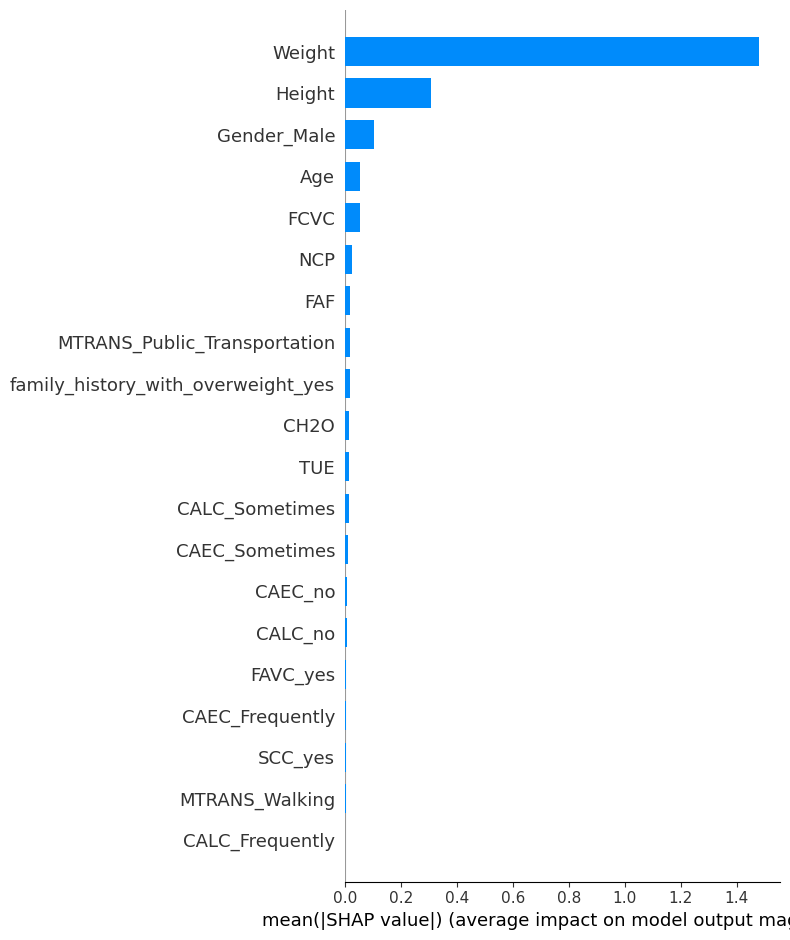

In [210]:
# Step 4: Visualize the SHAP values

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


#### Analysis of the Top 5 Features

The identified features - weight, height, gender, age, and FCVC (eating vegetables) - have the most substantial association with obesity levels.

- **Weight and Height:** These are fundamental physical attributes directly linked to body mass index (BMI), a common measure of obesity.
- **Gender:** Gender often plays a role in body composition and fat distribution, influencing obesity risk.
- **Age:** Metabolic changes and lifestyle factors associated with age can affect weight management.
- **FCVC (Eating Vegetables):** Dietary habits, particularly vegetable consumption, are crucial for maintaining a healthy weight and preventing obesity.

#### Potential Relationships and Interactions

While these features individually contribute to obesity risk, their combined effect might be more complex.

- **Weight and Height:** These two factors interact to determine BMI, a key indicator of obesity.
- **Gender and Weight:** The relationship between weight and obesity can vary by gender due to hormonal differences and body composition.
- **Age and Weight:** Aging can influence metabolism and physical activity levels, affecting weight management.
- **FCVC and Weight:** A diet rich in vegetables is often associated with lower obesity risk due to its nutritional value and potential impact on overall calorie intake

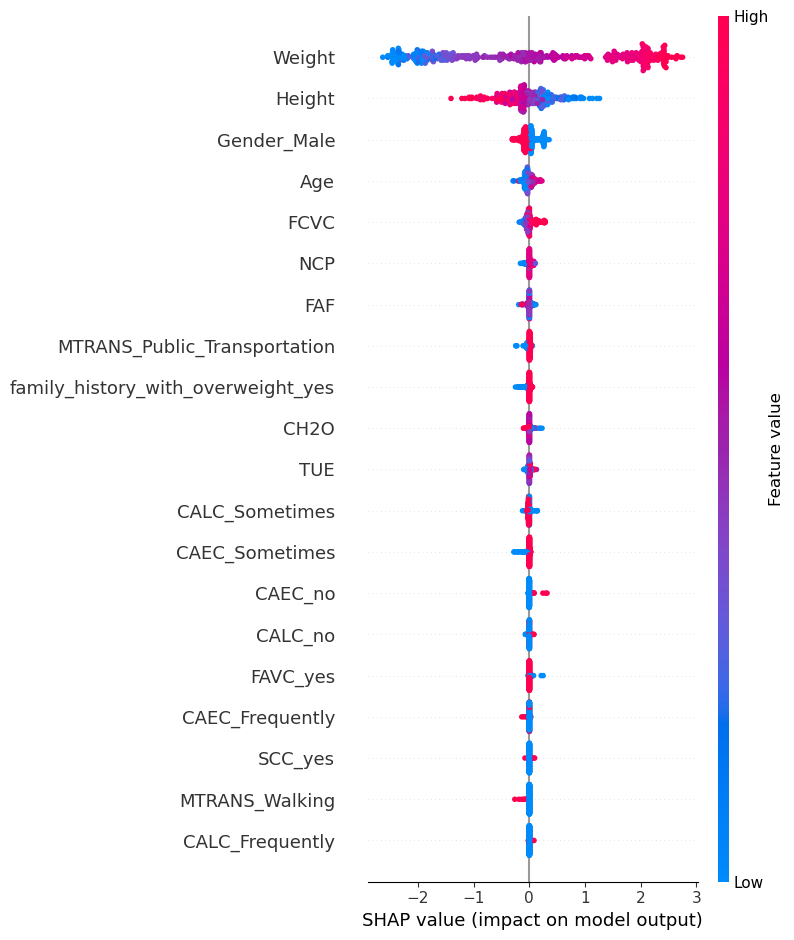

In [211]:
# Detailed summary plot
shap.summary_plot(shap_values, X_test)

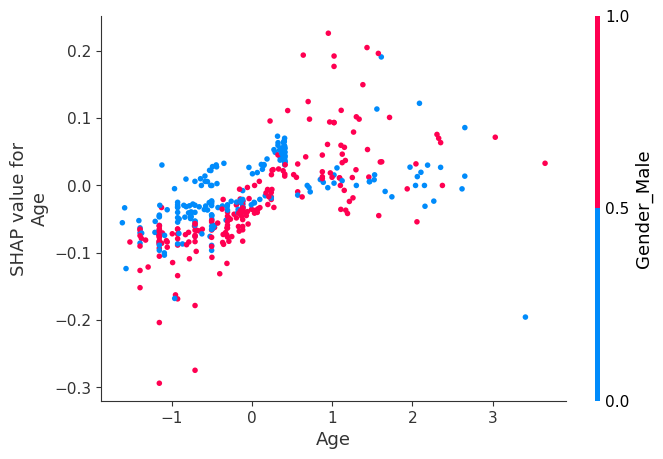

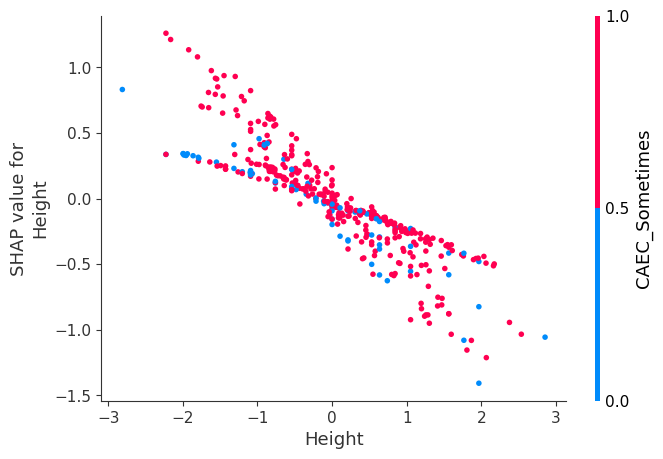

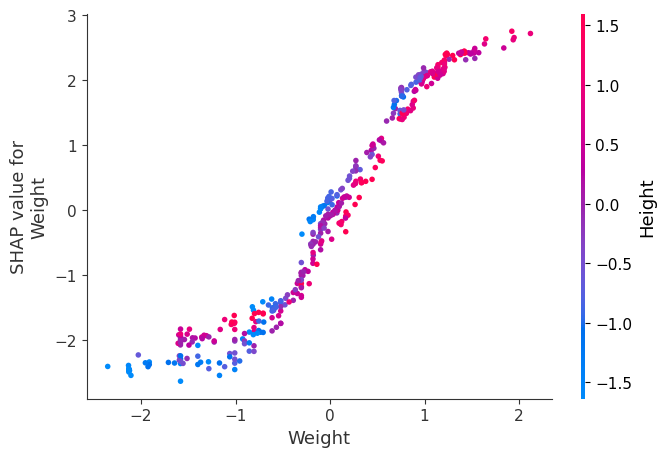

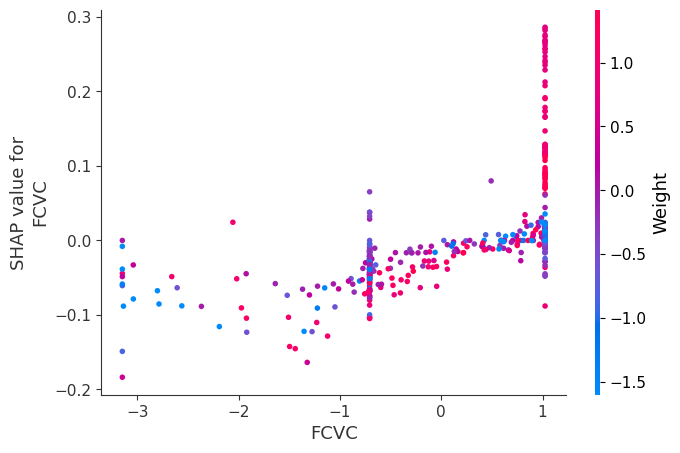

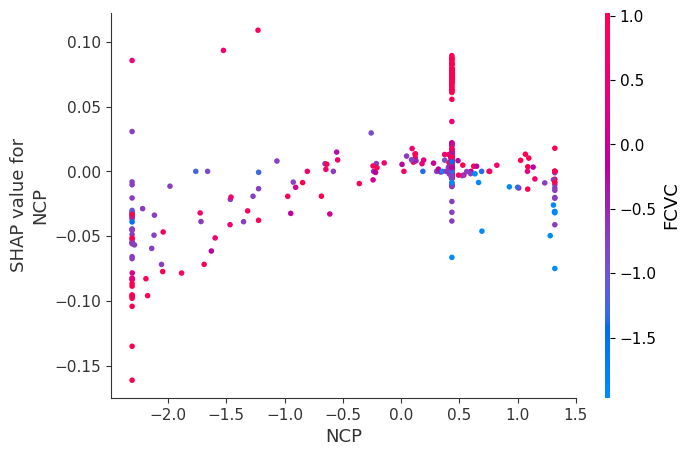

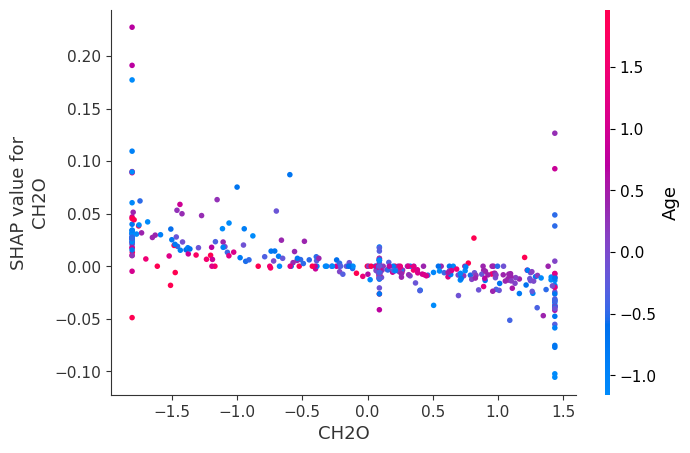

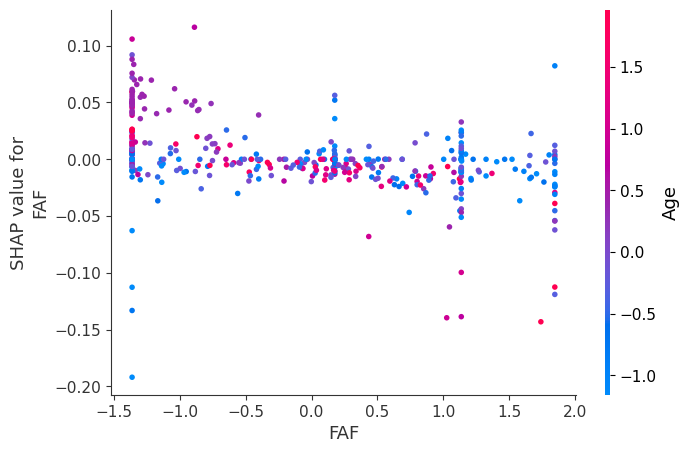

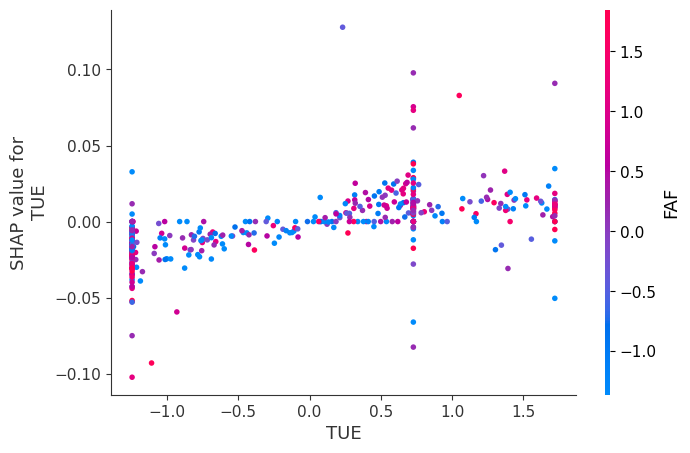

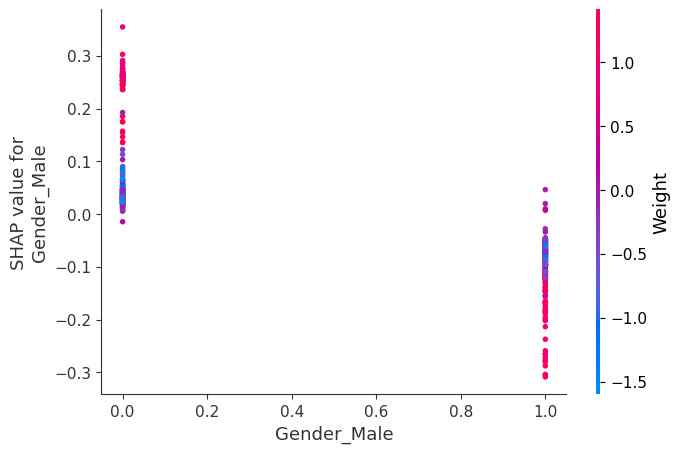

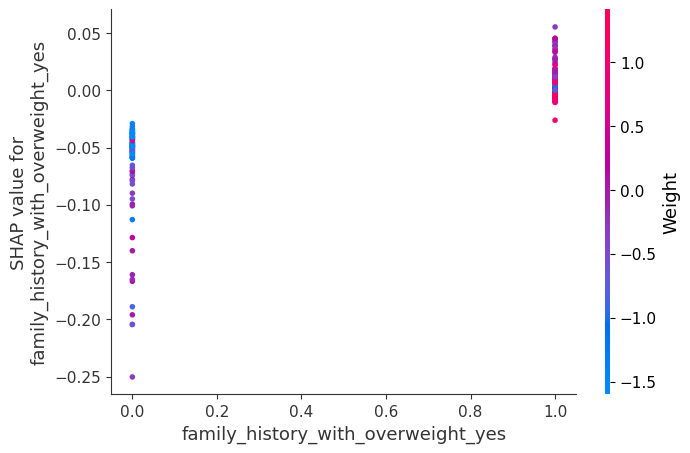

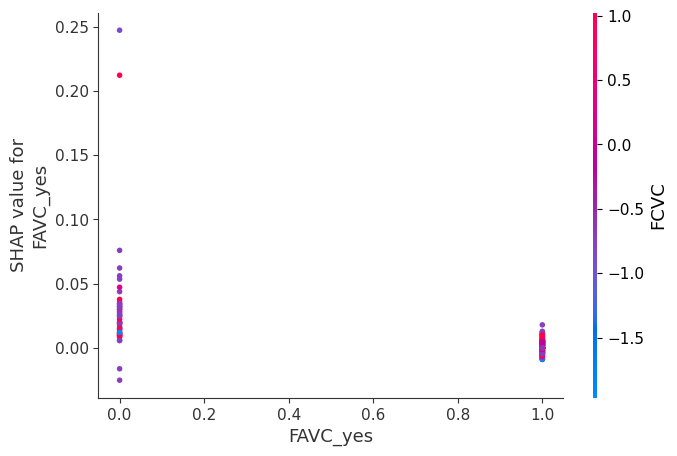

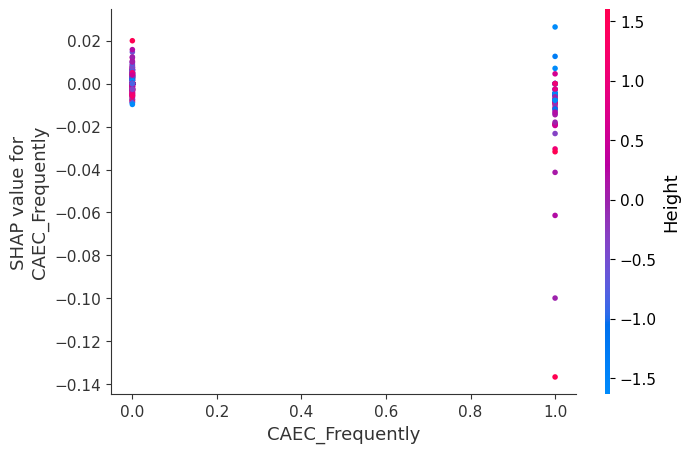

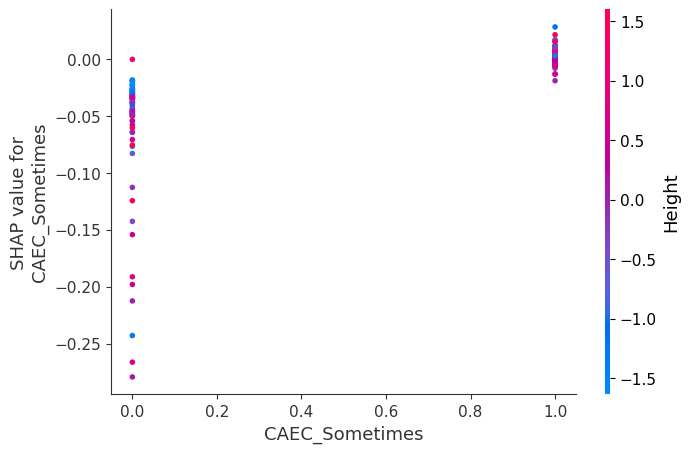

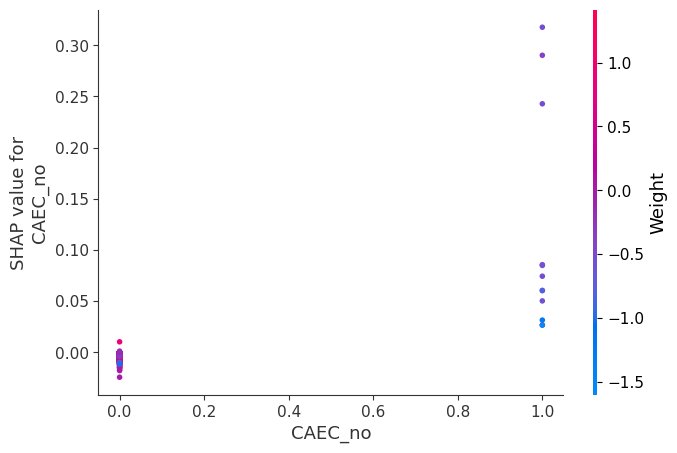

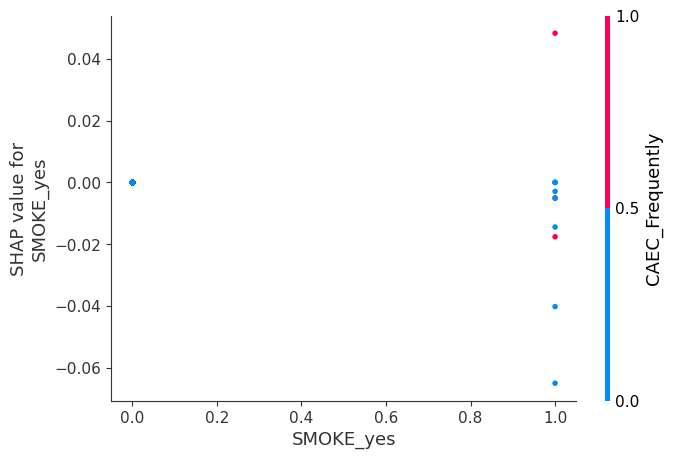

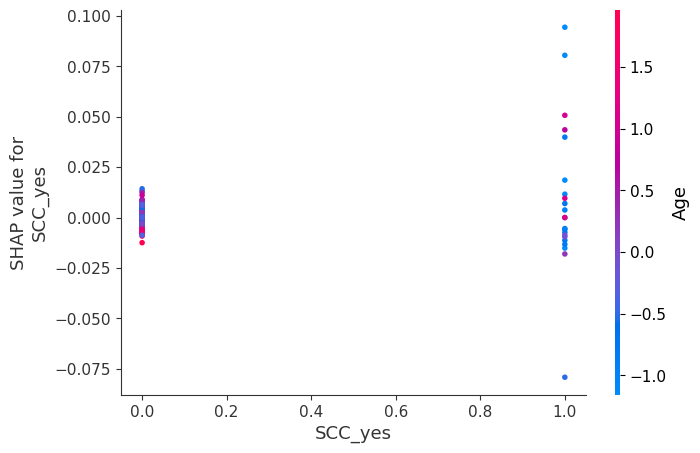

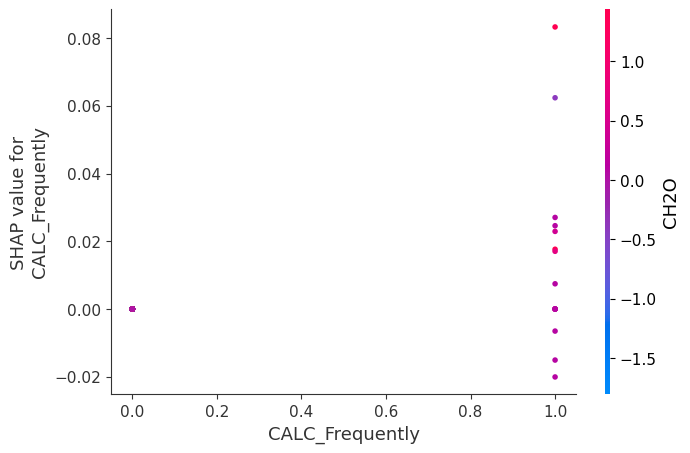

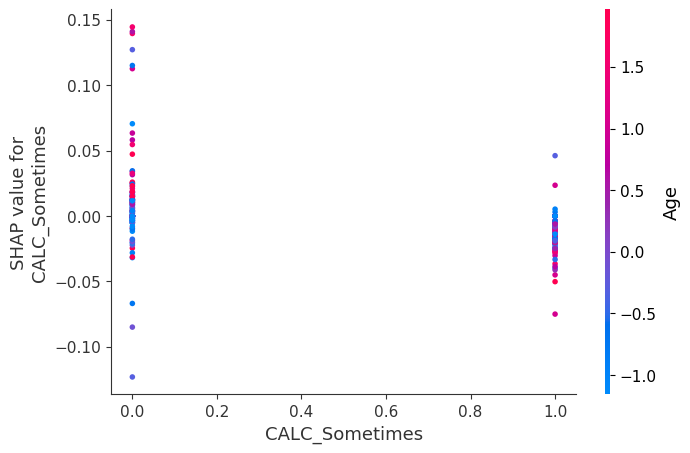

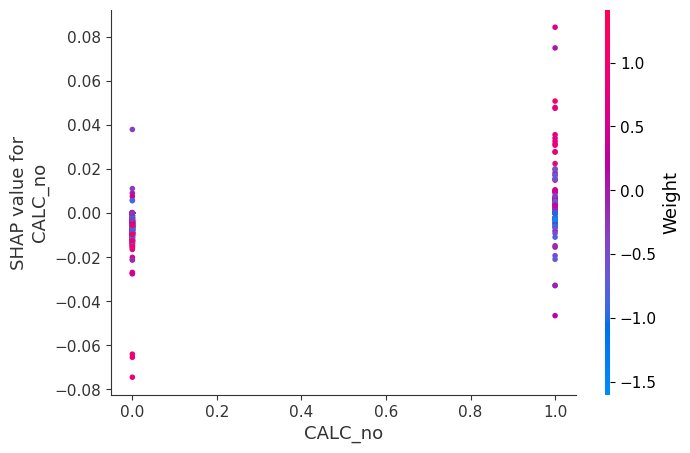

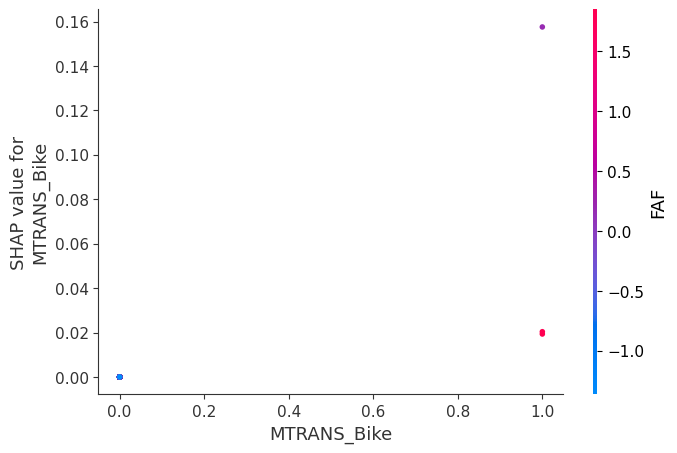

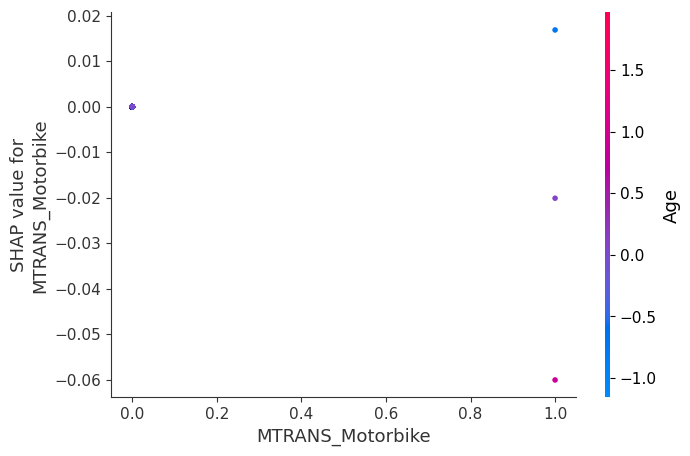

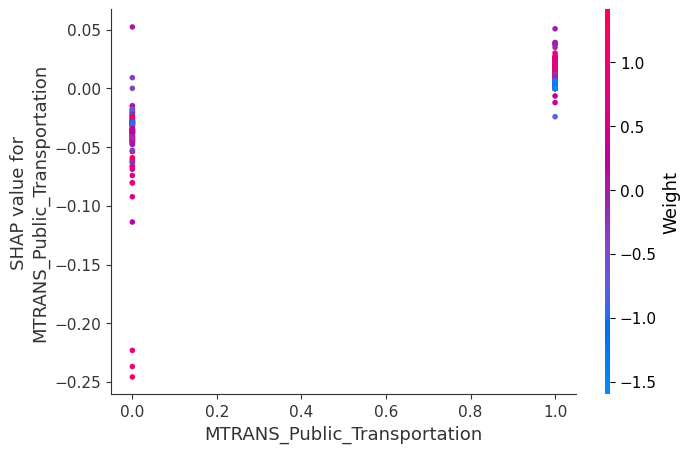

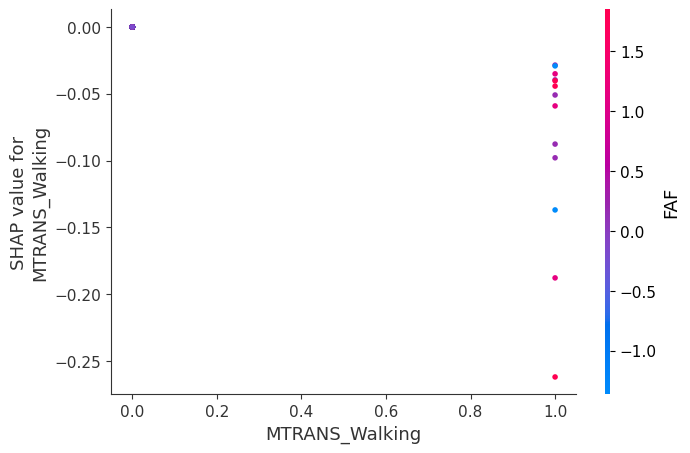

In [212]:
# SHAP dependence plots for individual features
for feature in range(X_test.shape[1]):
    shap.dependence_plot(feature, shap_values, X_test)

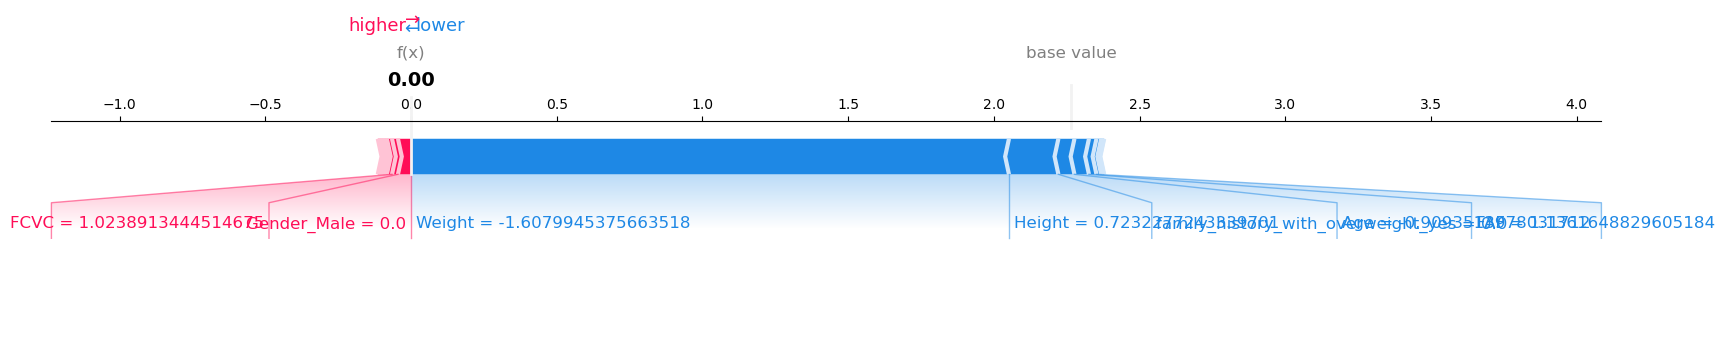

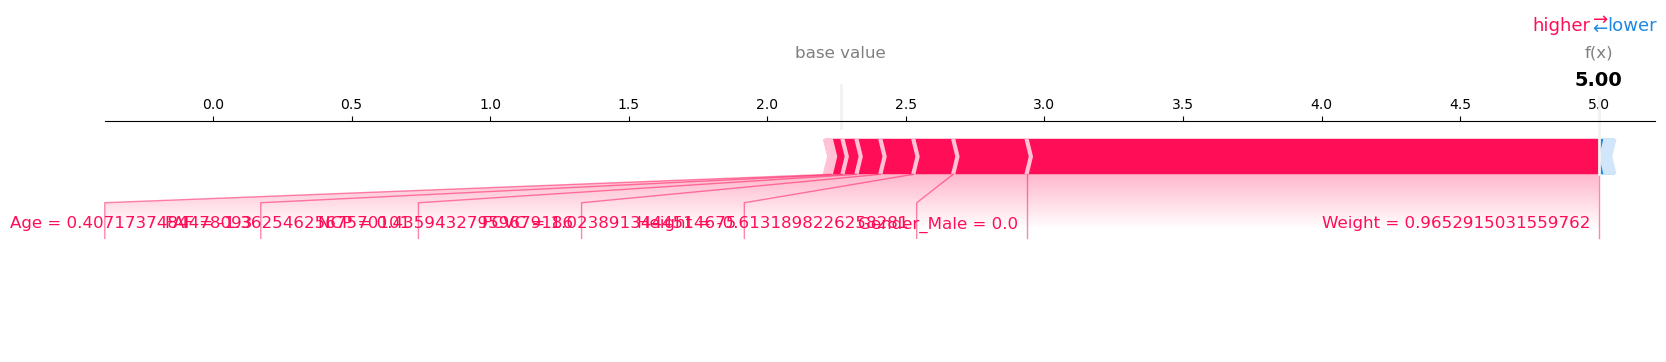

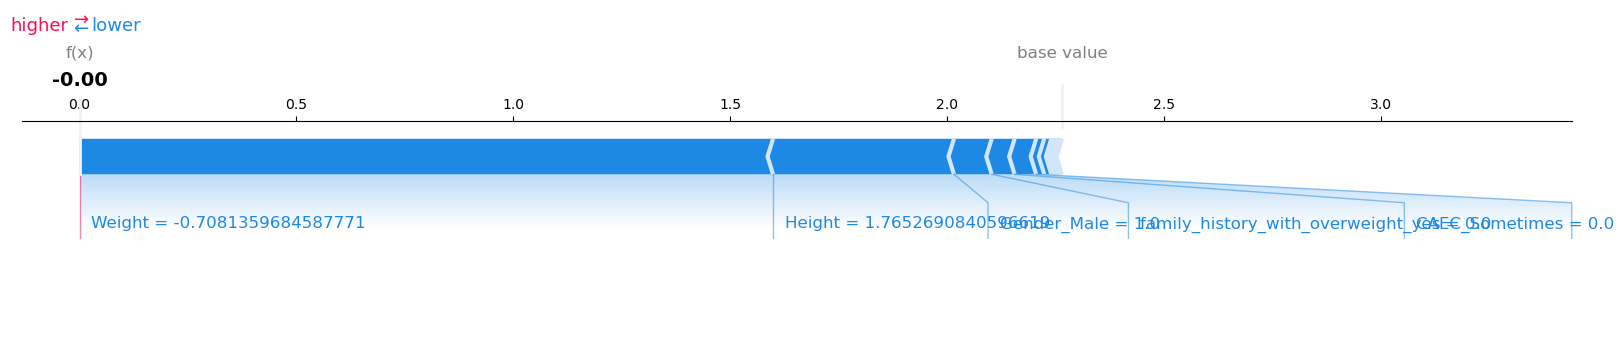

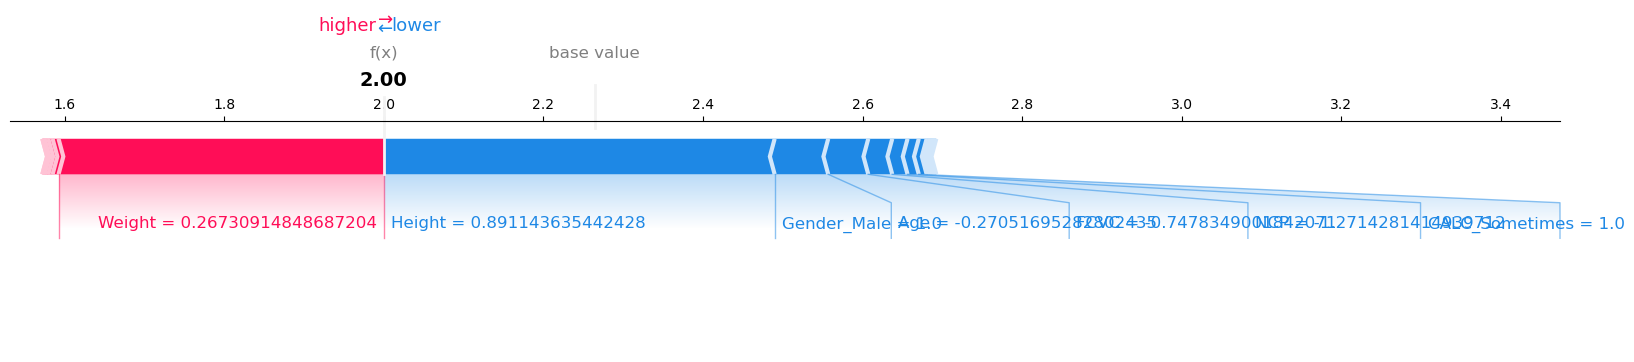

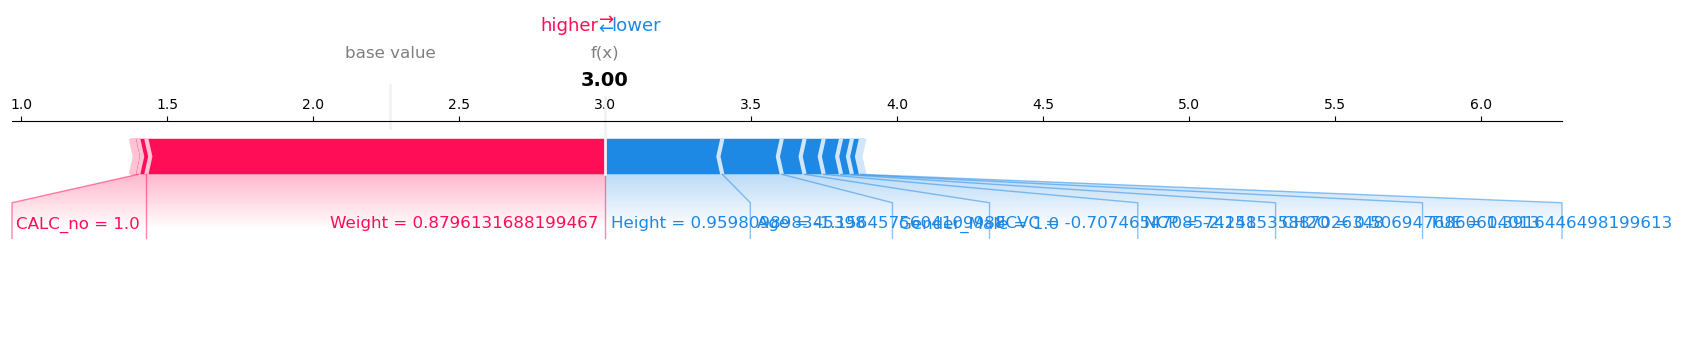

In [213]:
# SHAP force plot for individual predictions
# Note: For large datasets, displaying force plots for all predictions might not be practical. Here we display for the first 5 predictions.
for i in range(5):
    shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i], matplotlib=True)

#### Demographic Factors

- **Weight and Height:** These are fundamental determinants of body mass index (BMI) and obesity.
- **Age:** Older individuals tend to have a higher risk of obesity.
- **Gender:** Gender differences in obesity rates are evident, with females often having higher rates.

#### Dietary Factors

- **FCVC (Frequent Consumption of Vegetables):** Higher vegetable consumption is generally associated with lower obesity risk.
- **NCP (Number of Main Meals):** The frequency of main meals seems to have a complex relationship with obesity, potentially influenced by other factors.
- **CAEC (Eating Between Meals):** Individuals who frequently eat between meals tend to have a higher risk of obesity.
- **SCC (Monitoring Calories):** Individuals who monitor their calorie intake are less likely to be obese.
- **FAVC (High Caloric Food Consumption):** Frequent consumption of high-calorie food is associated with increased obesity risk.

#### Lifestyle Factors

- **SMOKE (Smoking):** Smokers tend to have a higher risk of obesity.
- **CALC (Alcohol Consumption):** Frequent alcohol consumption might be linked to higher obesity risk.
- **FAF (Physical Activity):** Regular physical activity is likely associated with lower obesity risk.
- **TUE (Technology Use):** Excessive screen time might contribute to obesity, but the relationship is complex and influenced by other factors.

#### Feature Interactions

Several features appear to interact with each other, influencing the overall impact on obesity risk. For example, the effect of calorie consumption (NCP, SCC) might be moderated by physical activity (FAF) and dietary habits (FCVC).

In [214]:
# If you want to visualize a single force plot for all predictions, you can use the following:
shap.force_plot(explainer.expected_value, shap_values, X_test)

## PDP (Partial Dependence Plot)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

In [145]:
rf_clf = RandomForestClassifier(n_estimators=30, max_depth=20, random_state=0, max_features='sqrt',
                                class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=30,
                       random_state=0)

In [146]:
# Make predictions for the test set
y_pred_test = rf_clf.predict(X_test)

In [147]:
# Print accuracy for the training and test sets
print("Accuracy on training set: {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_clf.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.853


In [148]:
# Print classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        58
           1       1.00      0.76      0.86        58
           2       0.98      0.71      0.82        58
           3       1.00      0.91      0.96        70
           4       1.00      0.93      0.97        60
           5       1.00      1.00      1.00        65

   micro avg       0.97      0.84      0.90       369
   macro avg       0.97      0.83      0.89       369
weighted avg       0.97      0.84      0.90       369
 samples avg       0.73      0.73      0.73       369



C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
# Calculate and display feature importances
feature_importances = rf_clf.feature_importances_
feature_names = X_train.columns

feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print(feature_importances_df)

                               feature  importance
2                               Weight    0.296069
0                                  Age    0.098824
1                               Height    0.094379
3                                 FCVC    0.079064
8                          Gender_Male    0.066315
5                                 CH2O    0.056115
6                                  FAF    0.051415
7                                  TUE    0.049038
4                                  NCP    0.048176
9   family_history_with_overweight_yes    0.023604
17                      CALC_Sometimes    0.022899
21        MTRANS_Public_Transportation    0.022315
18                             CALC_no    0.020015
12                      CAEC_Sometimes    0.019199
10                            FAVC_yes    0.019042
11                     CAEC_Frequently    0.009830
15                             SCC_yes    0.006263
16                     CALC_Frequently    0.005072
13                             

In [150]:
# Features for PDP
num_features = ['Weight', 'Age', 'Height']  # Replace with actual numerical features from your dataset

In [161]:
classes = [
    'NObeyesdad_Normal_Weight',
    'NObeyesdad_Obesity_Type_I',
    'NObeyesdad_Obesity_Type_II',
    'NObeyesdad_Obesity_Type_III',
    'NObeyesdad_Overweight_Level_I',
    'NObeyesdad_Overweight_Level_II'
]

In [162]:
# Get the unique classes in the target variable
classes = np.unique(y_train)
classes

array([0, 1], dtype=uint8)

In [1]:
###### Create a figure to hold subplots
fig, axes = plt.subplots(nrows=len(classes), ncols=len(num_features), figsize=(15, 10), sharex='all', sharey='all')

# Flatten the axes array for easier iteration
axes = axes.flatten() if len(num_features) > 1 else np.array([axes])

# Plot PDPs for each feature and class
for i, feature in enumerate(num_features):
    feature_index = X_train.columns.get_loc(feature)  # Get the index of the feature
    for j, class_label in enumerate(classes):
        # Plot PDP for the specified class
        display = PartialDependenceDisplay.from_estimator(
            rf_clf,
            X_train,
            features=[feature_index],
            response_method='predict_proba',  # Use predict_proba for multi-class
            target=class_label,
            ax=axes[i * len(classes) + j],
            grid_resolution=50  # Resolution of the grid to compute PDP
        )
        axes[i * len(classes) + j].set_title(f'Feature: {feature}, Class: {class_label}')

# Adjust layout
plt.tight_layout()
plt.suptitle('Partial Dependence Plots for Selected Features and Classes', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust top space for title
plt.show()

NameError: name 'plt' is not defined